In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import seaborn as sns
import src.utils.plot_config
import matplotlib.pyplot as plt
import src.utils.data_utils as data_utils
import Utils_Part4_Pop_Consistency as Part4_Utils

# Check if LaTeX is available, if not we don't import the plot_config module
latex_available = False
try:
    plt.rcParams['text.usetex'] = True
    plt.text(0, 0, "Test", fontsize=12)
    latex_available = True
    plt.close()
except Exception as e:
    print("LaTeX is not available. Error:", e)
finally:
    plt.rcParams['text.usetex'] = False 

# Import the plot_config module if LaTeX is available
if latex_available:
    import src.utils.plot_config

In [2]:
ROOT_PATH = os.getcwd()
DATA_PATH = os.path.join(ROOT_PATH, 'data')
TIME_SERIES_PATH = os.path.join(DATA_PATH, 'time_series')
CHANNELS_PATH = os.path.join(DATA_PATH, 'channels')
VIDEO_METADATA_PATH = os.path.join(DATA_PATH, 'video_metadata')

# 4) Popularity Consistency

In this section, we will try to understand whether Music or Entertainment maintains popularity better throughout time. To do so, we will use the Time-Series Dataset, which contains one time point per week over an average period of approximately 2.8 years per channel. The dataset contains data early January 2015 to the end of September 2019 The main metric of interest will be $\Delta \textrm{Views}$, which is the number of new views a channel got during a one week time frame. We will first analyze how $\Delta \textrm{Views}$ evolves after a video has been uploaded. Then, for every spike in $\Delta \textrm{Views}$ detected in a channel's time-series, we will look at the time it takes for the spike to return to a certain baseline and the rate at which it decays. This analysis will be done once for the entire Music and Entertainment time-series datasets, as well as for the top channels within both categories. Finally, some time-series plots will be given as illustrations for some of the bigger channels.

In [312]:
# Load Time-series DataFrame
df_time_series = pd.read_csv(f"{DATA_PATH}/time_series.tsv.gz", sep="\t", compression="gzip")

# Clean Nan entries and separate into Music and Entertainment DataFrames
df_time_series_music, df_time_series_entertainment = Part4_Utils.clean_and_categorize(df_time_series)

## 4.1) Basic Stats and General Time Evolution

This sub-section presents two basic statistics for Music and Entertainment, which are the total number of entries and the number of entries where at least one new video has been published. Then for both Music and Entertainment, the general time evolution of the mean $\Delta \textrm{Views}$, the mean $\Delta \textrm{Subs}$ and the mean $\Delta \textrm{Videos}$ is shown. For each metric, the time-series is given with and without rolling mean.

In [313]:
# Basic stats
# Music
Part4_Utils.basic_stats(df_time_series_music, category='Music')

# Entertainment
Part4_Utils.basic_stats(df_time_series_entertainment, category='Entertainment')

Number of entries for Music category: 3532411
Number of entries for Music with delta_videos >= 1: 1085043       (30.72% of total)
Number of entries for Entertainment category: 3071292
Number of entries for Entertainment with delta_videos >= 1: 1450136       (47.22% of total)


We observe that Music has more entries than Entertainment. However, it has a lower fraction of entries with at least one new video uploaded, suggesting that videos are published more frequently in the Entertainment category than in Music.

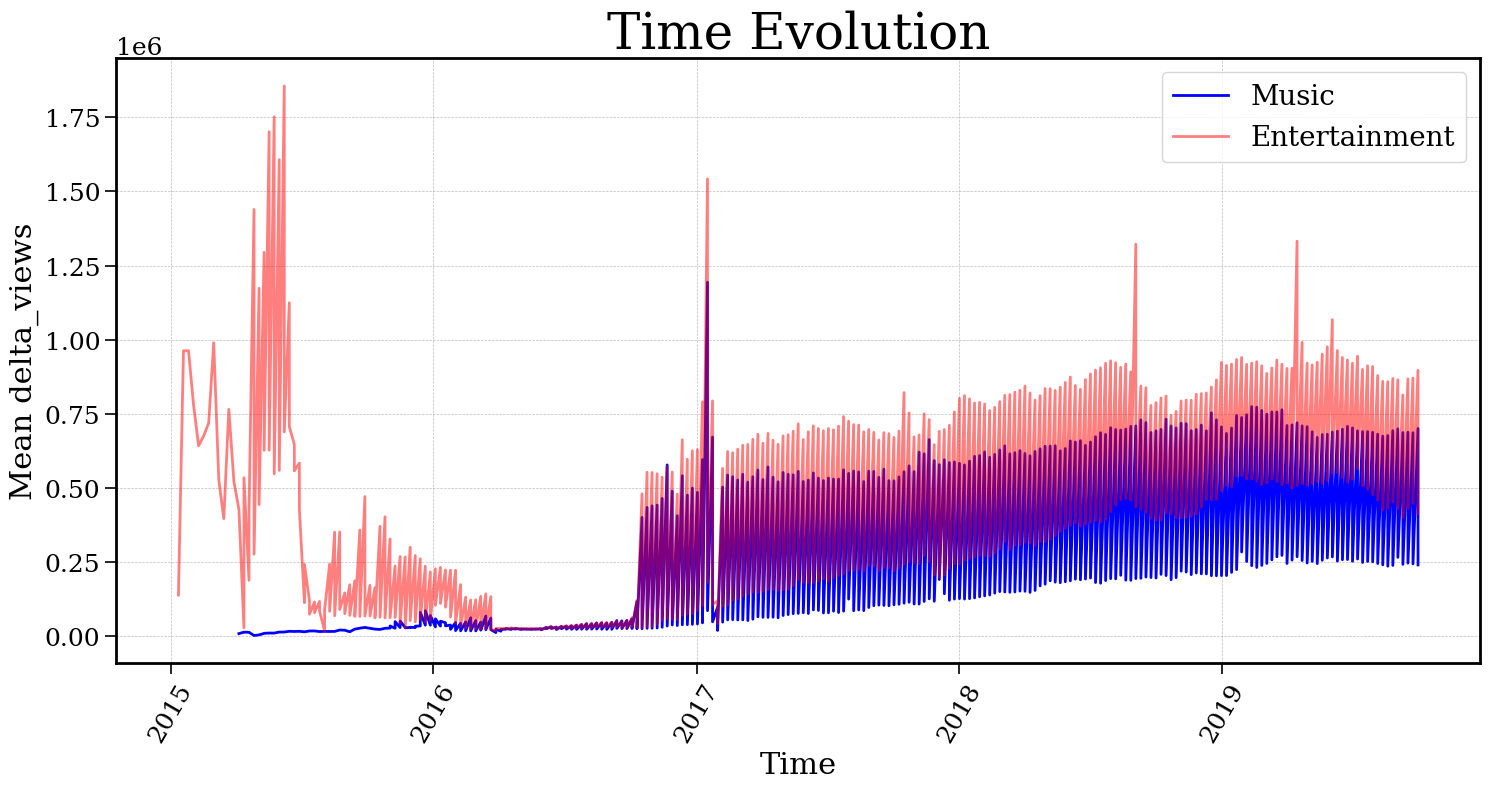

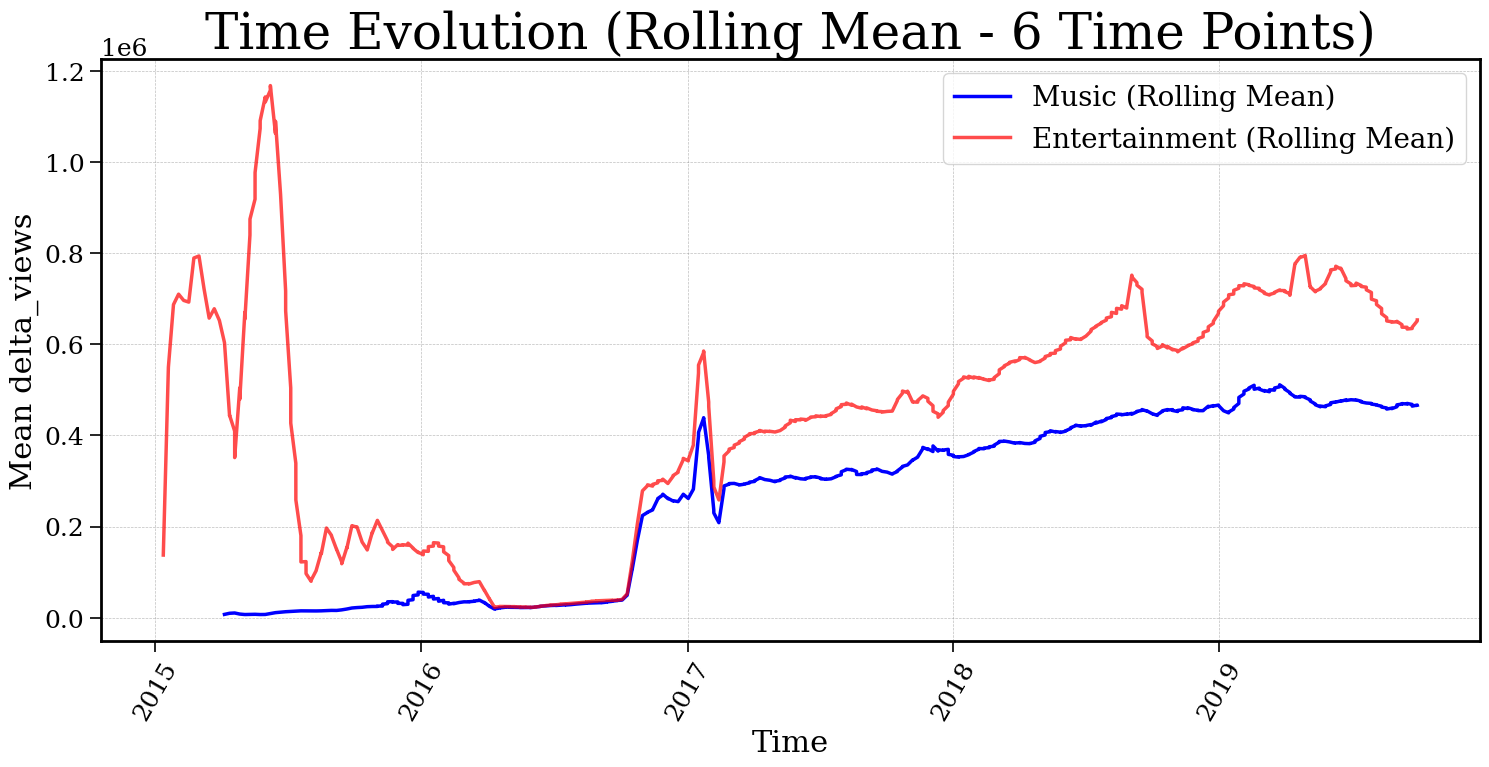

In [325]:
# Time Evolution of delta_views mean
Part4_Utils.plot_general_mean(df_time_series_music, df_time_series_entertainment, metric='delta_views')

# Time Evolution of delta_subs mean
Part4_Utils.plot_general_rolling_mean(df_time_series_music, df_time_series_entertainment, metric='delta_views', rolling_window=6)

On the two plots above, we observe that overall Entertainment has a higher mean $\Delta \textrm{Views}$ over the considered time frame (January 2015 - September 2019). In 2015, Entertainment has a mean $\Delta \textrm{Views}$ much higher than Music, then in mid-2016 they are quite similar. There is an unexplained spike in early 2017, and then the trend is clearly settled with a greater mean $\Delta \textrm{Views}$ for Entertainment.\
In addition, when no rolling average is performed, we observe a high variance from week to week with many oscillations on the graph. This behavior is smoothed out to some extent with a rolling average over 6 weeks.

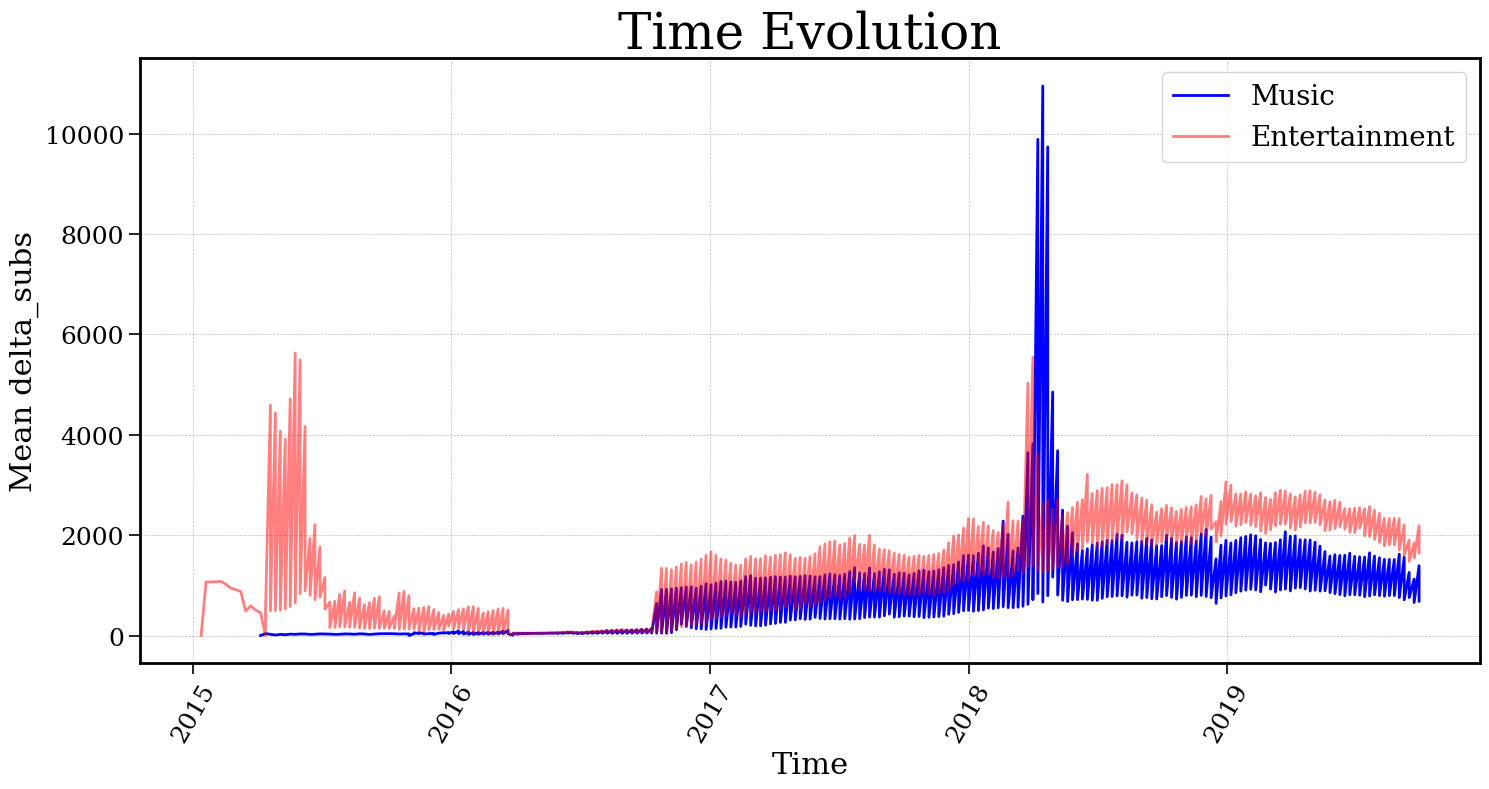

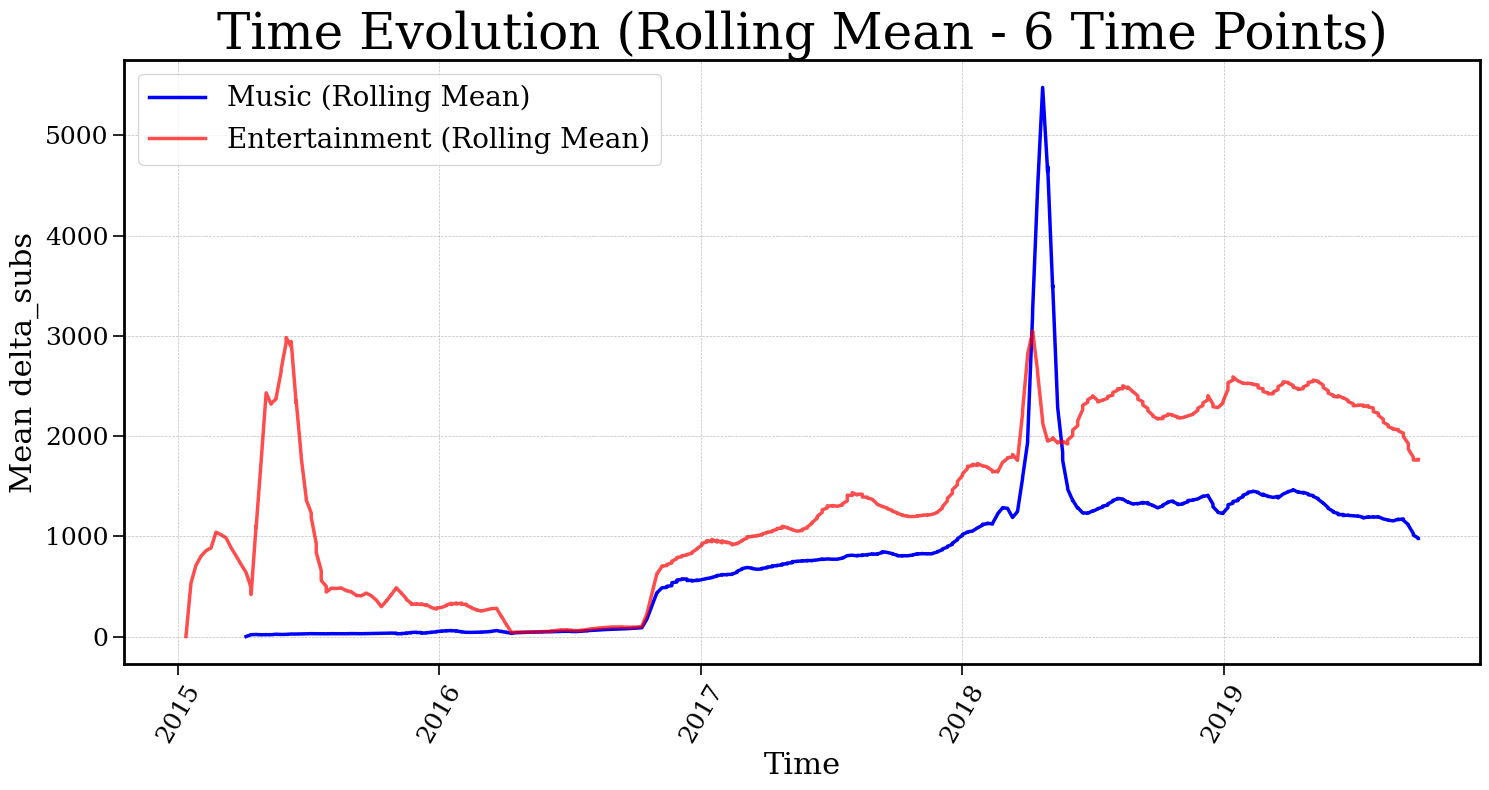

In [326]:
# Rolling average of time evolution of delta_views mean
Part4_Utils.plot_general_mean(df_time_series_music, df_time_series_entertainment, metric='delta_subs')

# Rolling average of time evolution of delta_subs mean
Part4_Utils.plot_general_rolling_mean(df_time_series_music, df_time_series_entertainment, metric='delta_subs', rolling_window=6)

On the two time-series for the mean $\Delta \textrm{Subs}$ above, the behavior of $\Delta \textrm{Subs}$ is quite similar to that of $\Delta \textrm{Views}$ given earlier. Entertainment dominates by far in 2015, then both categories become quite similar (nearly indistinguishable on the graph). Finally, from 2017 on the Entertainment category has higher mean $\Delta \textrm{Subs}$ than the Music category, except for a strange very high peak in April/May 2018 which is more pronounced for Music. This may be due to some event internal to YouTube where subscribers were merged. It would be interesting to investigate this to find out the cause of this spike in $\Delta \textrm{Subs}$. Once again, there is high variance in week to week $\Delta \textrm{Subs}$ that is smoothed out with the rolling average.

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['datetime'] = pd.to_datetime(df_music['datetime'])
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ent['datetime'] = pd.to_datetime(df_ent['datetime'])


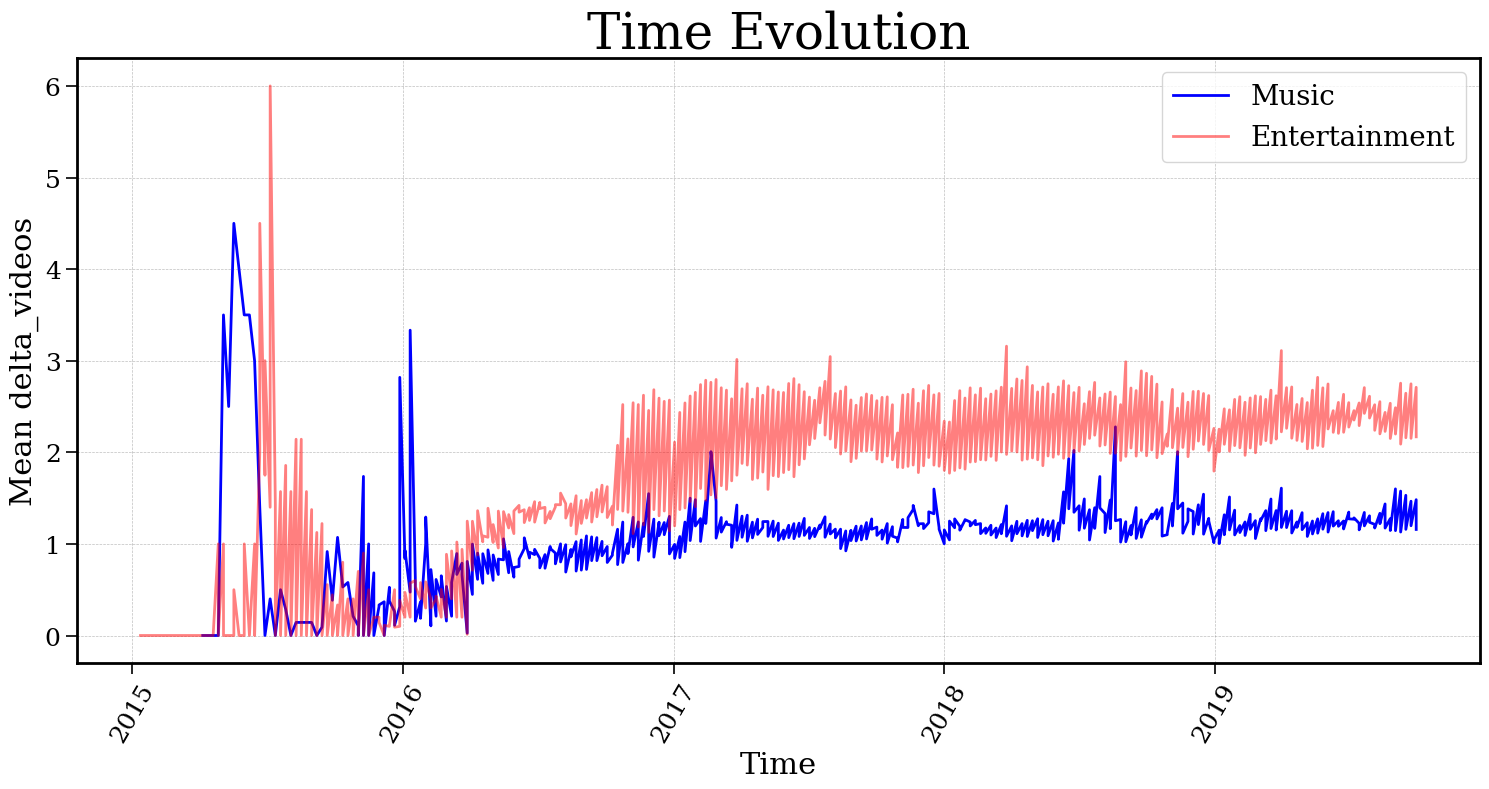

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:251: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['datetime'] = pd.to_datetime(df_music['datetime'])
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:257: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ent['datetime'] = pd.to_datetime(df_ent['datetime'])


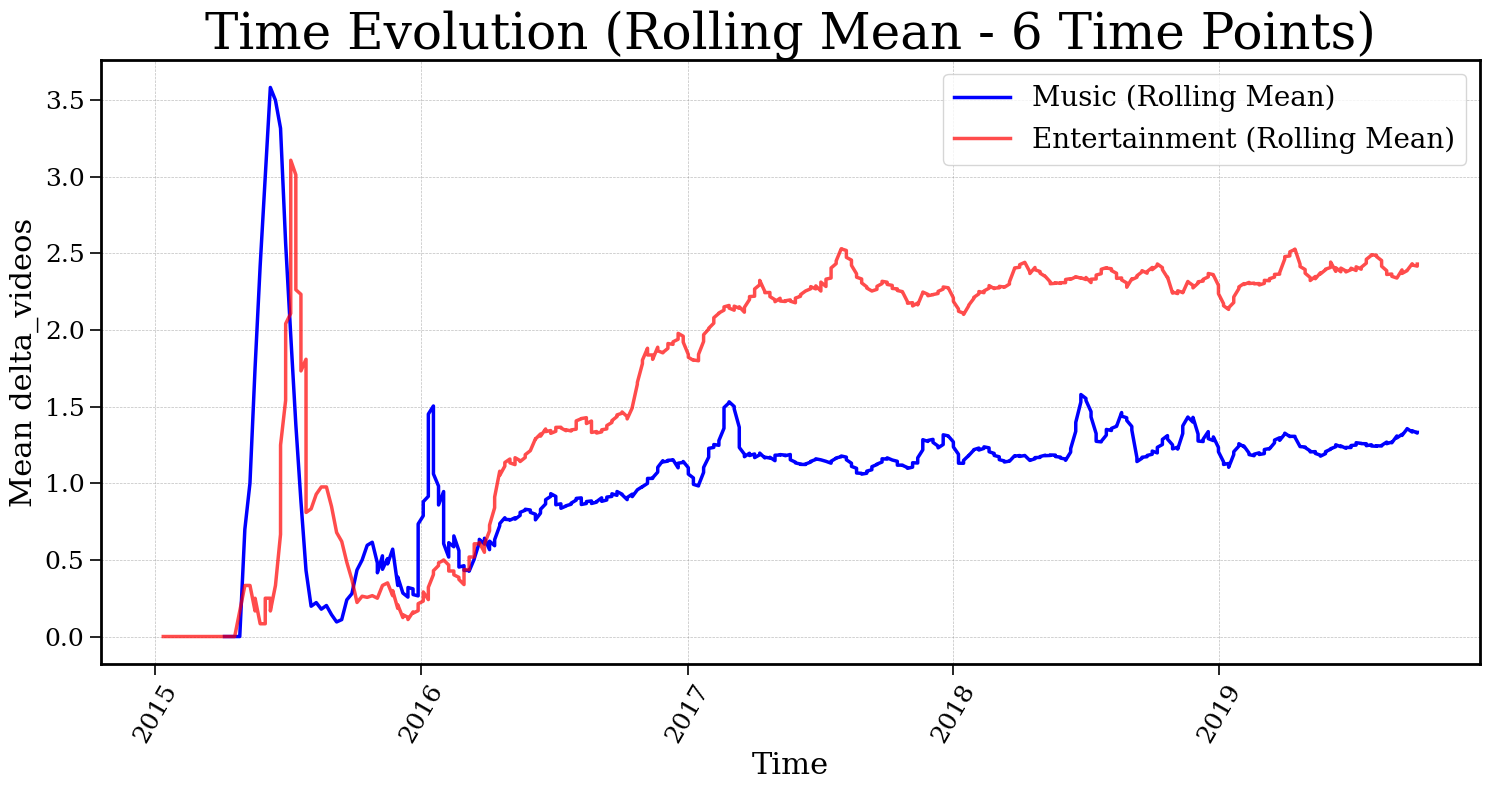

In [15]:
# Time Evolution of delta_videos mean
Part4_Utils.plot_general_mean(df_time_series_music, df_time_series_entertainment, metric='delta_videos')

# Rolling average of time Evolution of delta_videos mean
Part4_Utils.plot_general_rolling_mean(df_time_series_music, df_time_series_entertainment, metric='delta_videos', rolling_window=6)

For the time evolution of the mean $\Delta \textrm{Videos}$ shown here, we observe that in 2015 videos are uploaded more frequently in the Music category than in Entertainment. However, this switches in early 2016 and Entertainment has higher mean $\Delta \textrm{Videos}$. From 2017 to September 2019, the rolling average of $\Delta \textrm{Videos}$ is approximately stable at $\sim$ 2.25 in Entertainment and at $\sim$ 1.25 in Music. Once again, the high week to week variance of $\Delta \textrm{Videos}$ is smoothed out with the rolling average.

## 4.2) $\Delta \textrm{Views}$ Evolution Following the Upload of One Video

In this sub-section, we will analyze how the mean $\Delta \textrm{Views}$ behaves after the upload of a video, and compare this behavior between the Music and Entertainment categories. To achieve this, we first specify a certain number of weeks $n_{weeks}$ over which we want to analyze the evolution of $\Delta \textrm{Views}$. Then we select all entries which have $\Delta \textrm{Videos}=1$ (one video upload) and for which no videos are uploaded for the following $n_{weeks}$ (for which $\Delta \textrm{Videos}=0$). Once this has been done for all channels, we then calculate the mean $\Delta \textrm{Views}$ for each week following the upload of a video up to $n_{weeks}$. Note that in this situation, the mean mixes different time periods and only caracterizes the evolution of $\Delta \textrm{Views}$ following the upload of one video, indepently of when the video was published on YouTube.

Below, we calculate the mean $\Delta \textrm{Views}$ for different $n_{weeks}$ from 1 month to 8 months ($n_{weeks}=4$ to $n_{weeks}=32$ by increments of 4 weeks) for the Music and Entertainment categories. Then we plot this mean with standard error of the mean (standard deviation of the sample divided by the square root of the sample size) as an information about uncertainty for all $n_{weeks}$ periods.

In [40]:
# Calculate Delta_views Evolution for time periods 1 (4 weeks) to 8 months (32 weeks) following upload of a video
weeks = [4, 8, 12, 16, 20, 24, 28, 32]
df_delta_views_list = Part4_Utils.calculate_metric_values_all_weeks(df_time_series_music, df_time_series_entertainment, weeks=weeks, metric='delta_views')

Number of initial video entries for n_weeks = 4: 522076
Number of valid entries for n_weeks = 4: 105840
Number of initial video entries for n_weeks = 4: 583256
Number of valid entries for n_weeks = 4: 70822
Number of initial video entries for n_weeks = 8: 522076
Number of valid entries for n_weeks = 8: 54816
Number of initial video entries for n_weeks = 8: 583256
Number of valid entries for n_weeks = 8: 32685
Number of initial video entries for n_weeks = 12: 522076
Number of valid entries for n_weeks = 12: 34535
Number of initial video entries for n_weeks = 12: 583256
Number of valid entries for n_weeks = 12: 19614
Number of initial video entries for n_weeks = 16: 522076
Number of valid entries for n_weeks = 16: 23763
Number of initial video entries for n_weeks = 16: 583256
Number of valid entries for n_weeks = 16: 13147
Number of initial video entries for n_weeks = 20: 522076
Number of valid entries for n_weeks = 20: 17392
Number of initial video entries for n_weeks = 20: 583256
Numbe

During the calculation of the mean $\Delta \textrm{Views}$ above, we print the number of initial entries with $\Delta \textrm{Videos}=1$, as well as the total number of following entries with $\Delta \textrm{Videos}=0$. As expected, the number of valid entries decreases with $n_{weeks}$ as it becomes rarer to have no video published during a longer time frame. Also, it is interesting to note that there are approximately 10% more entries with $\Delta \textrm{Videos}=1$ in the Entertainment category than in the Music category.

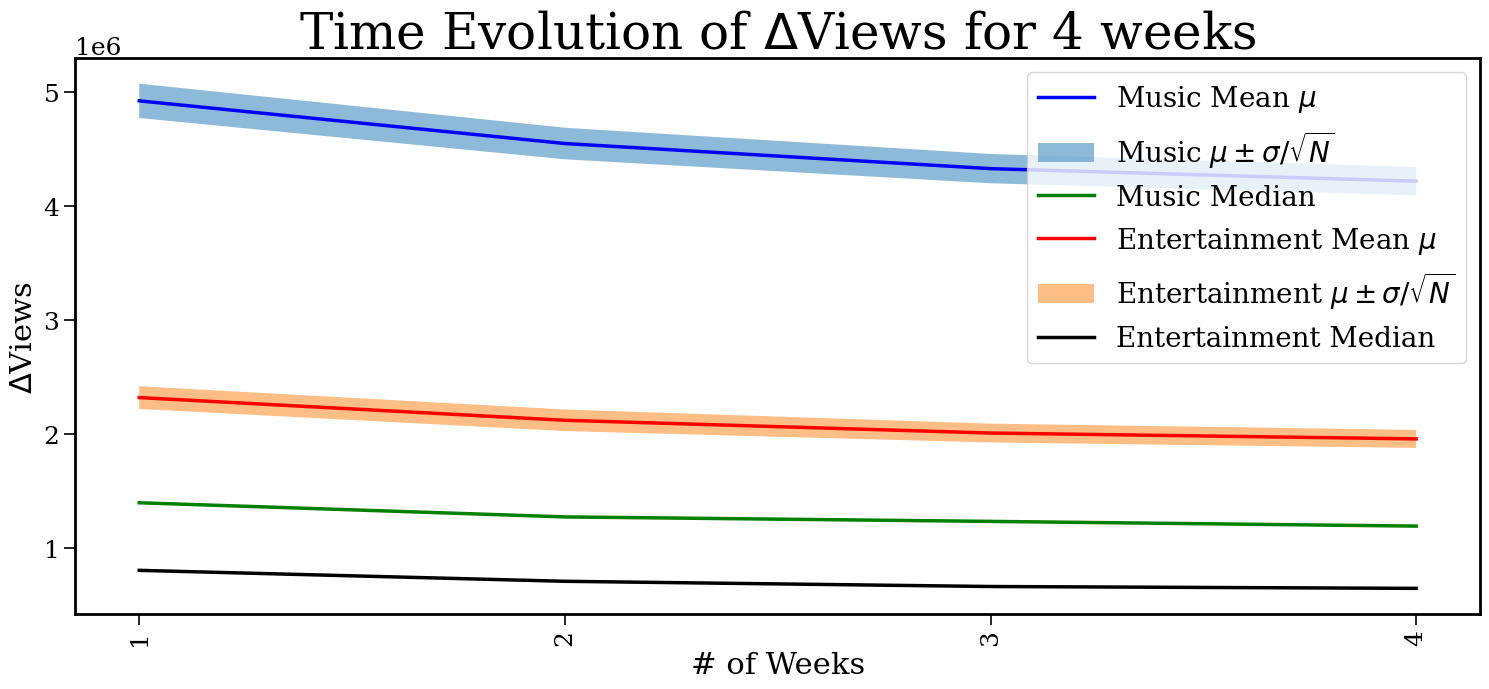

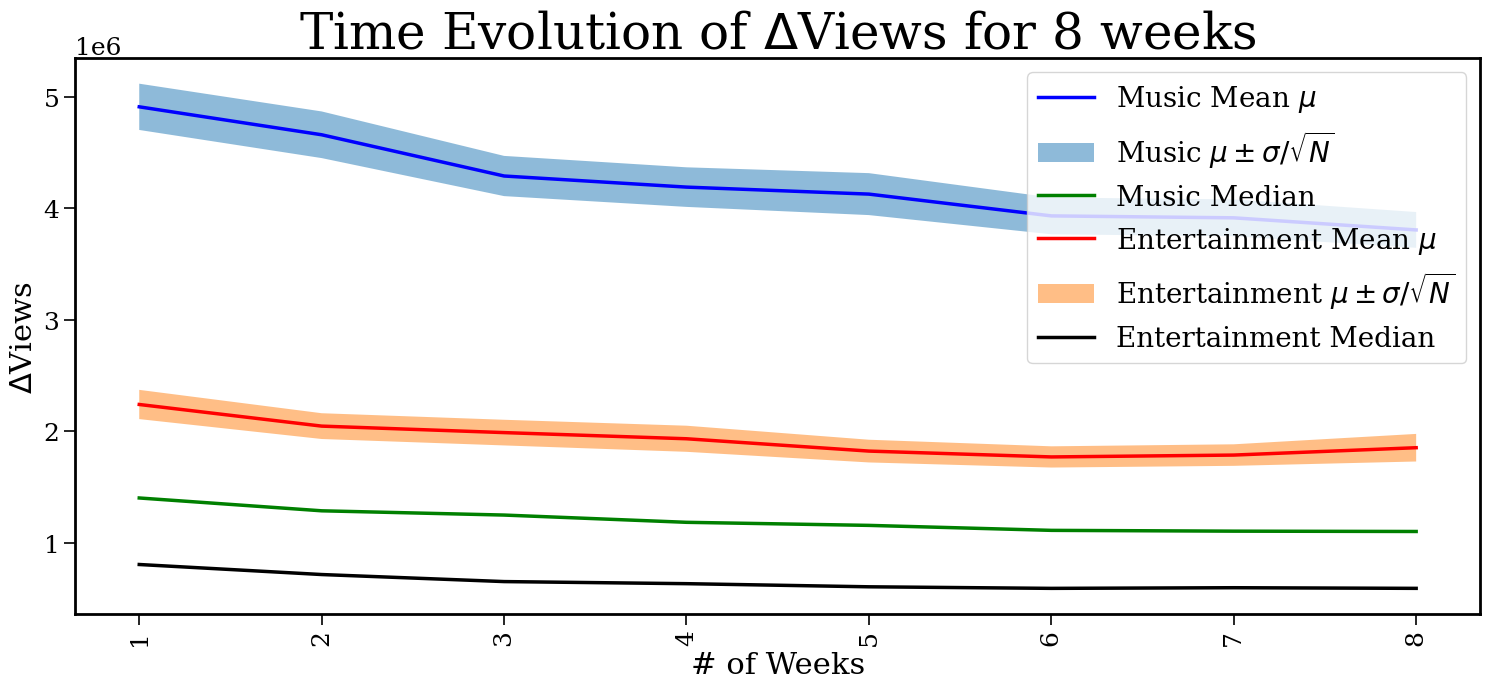

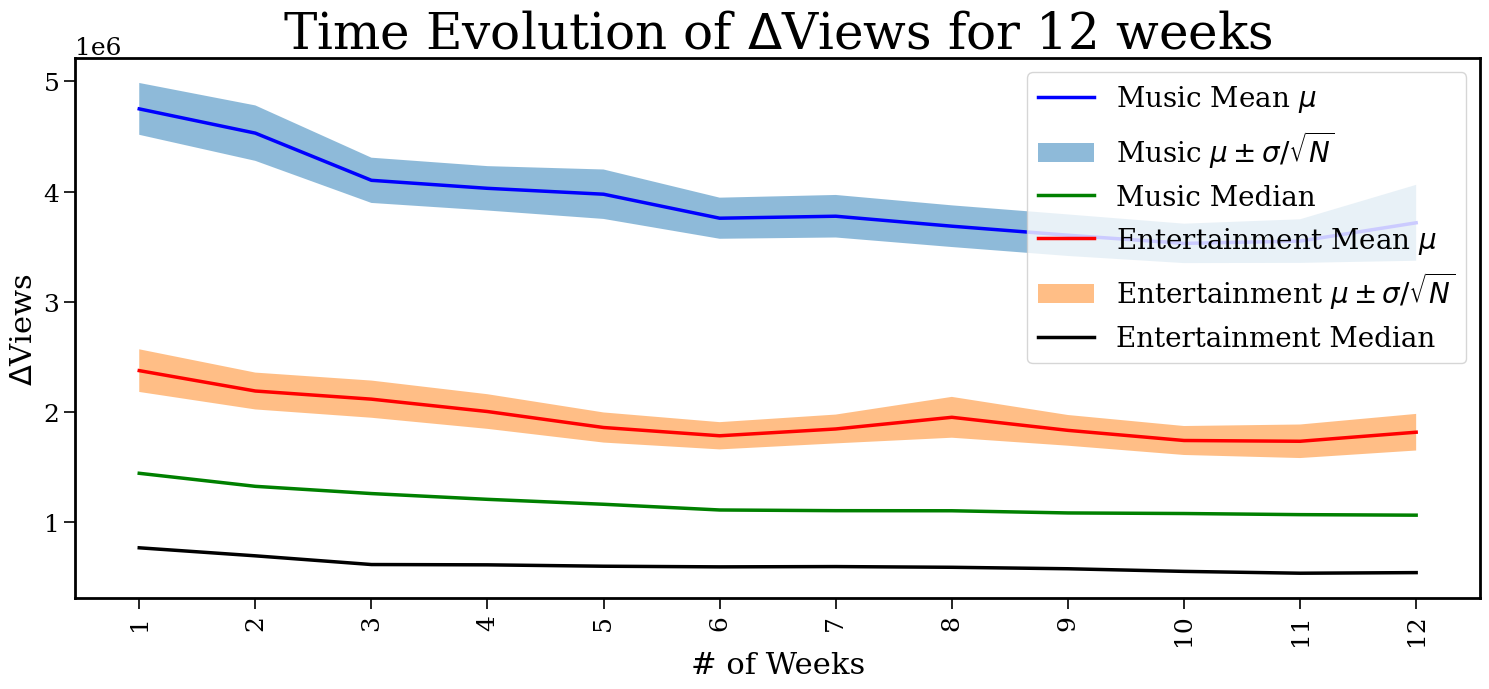

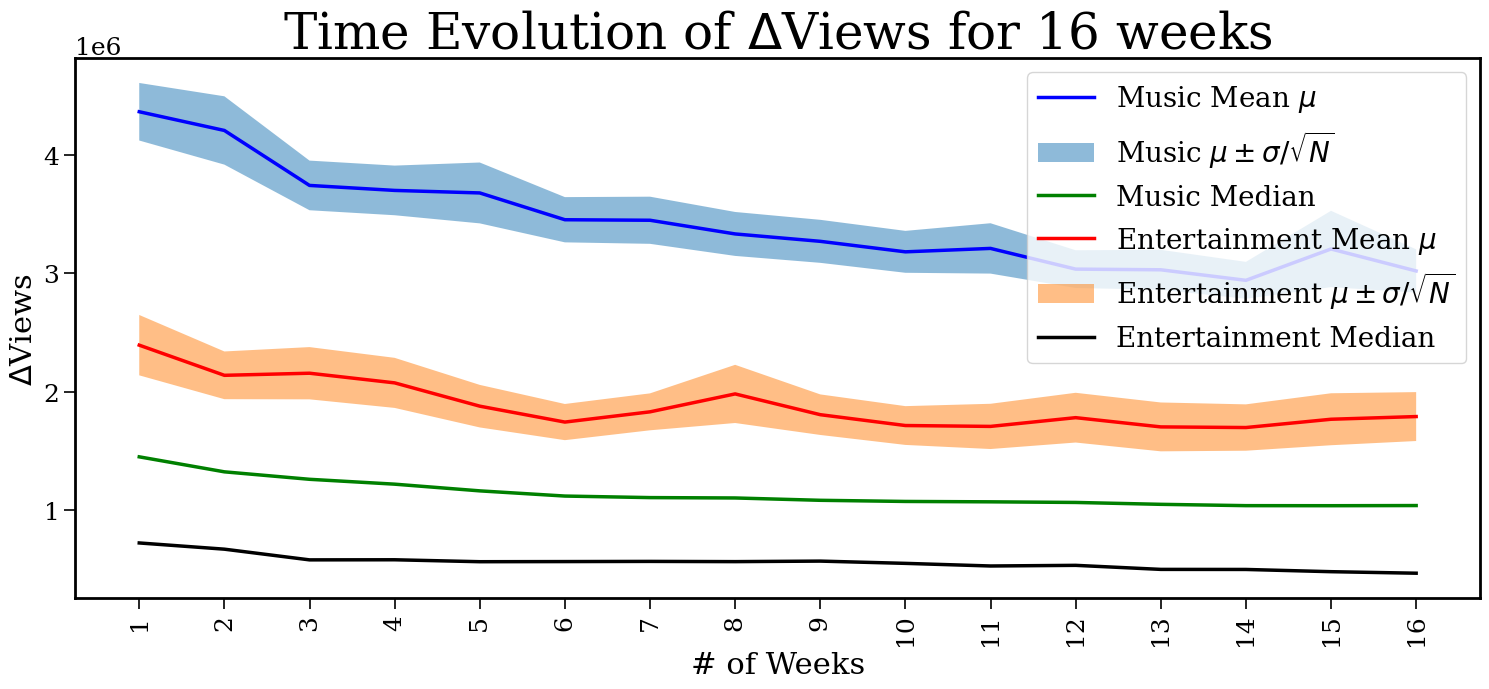

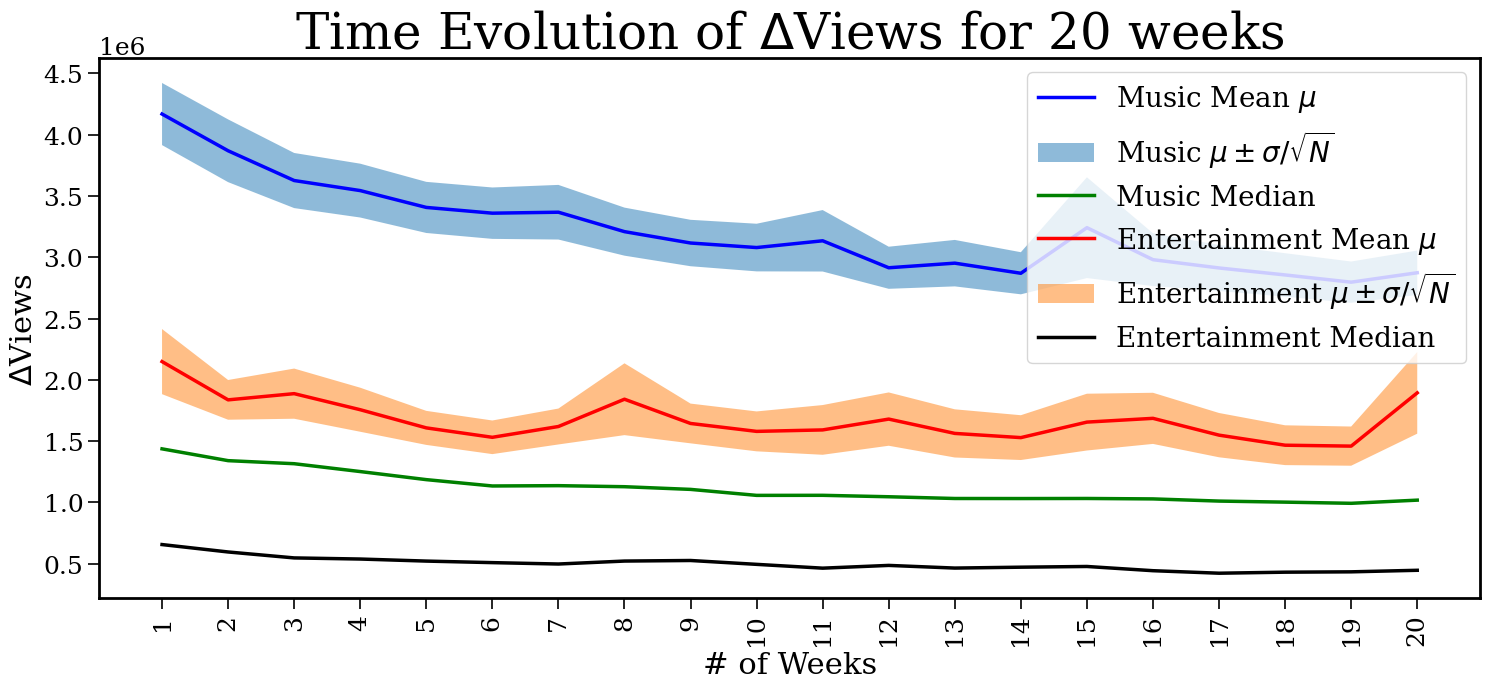

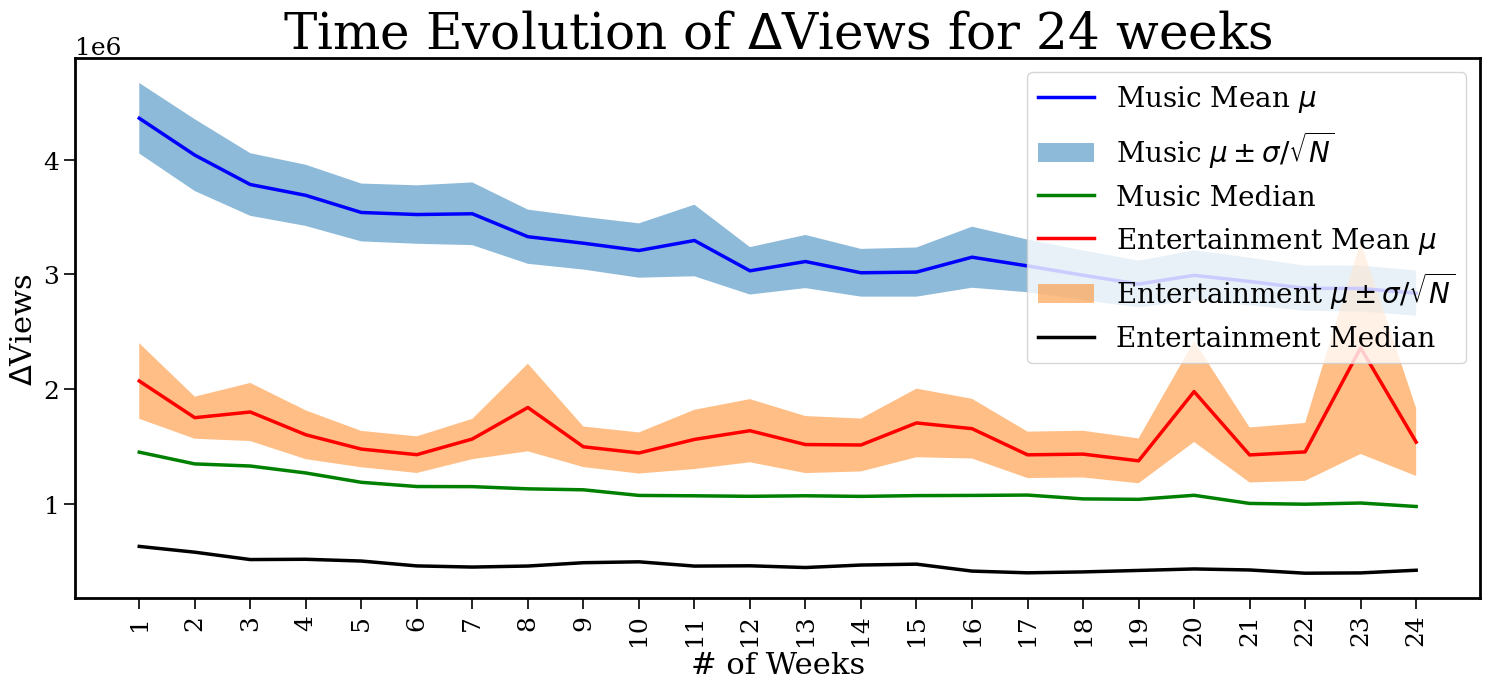

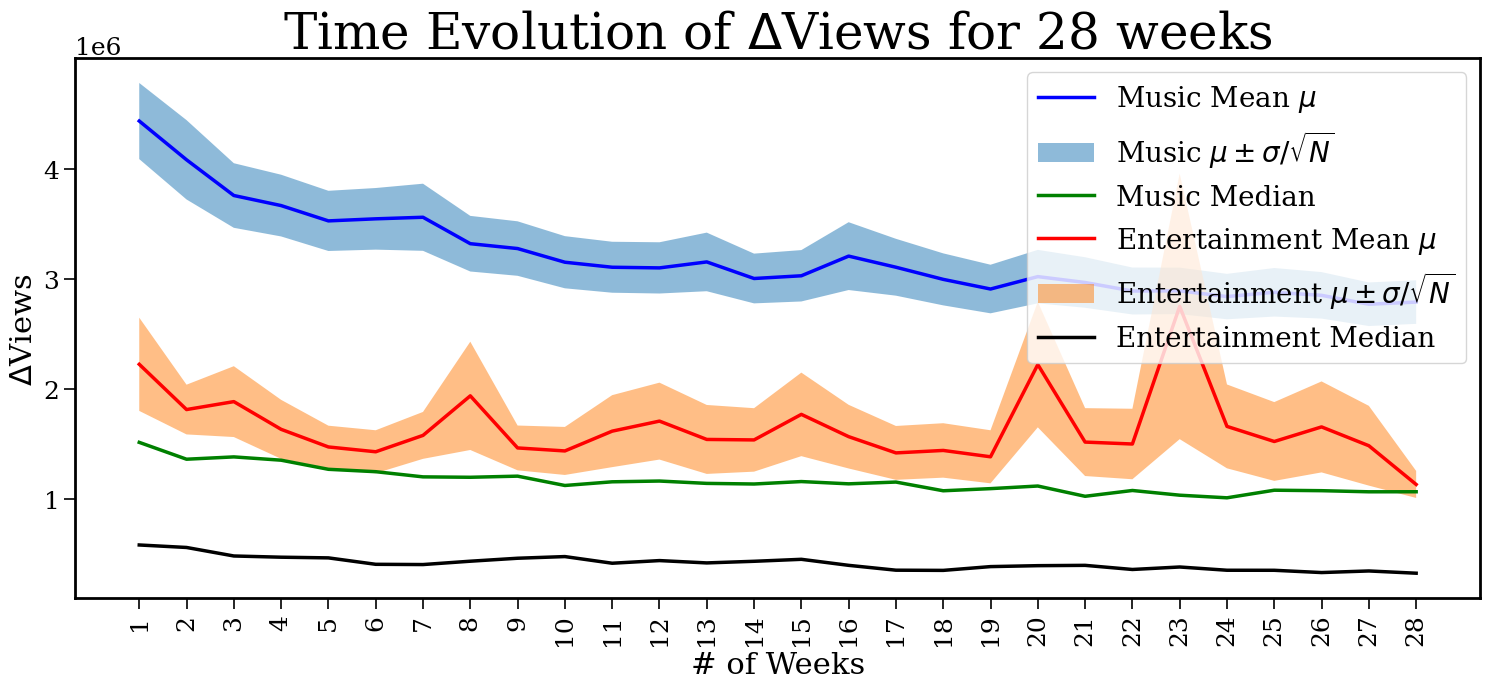

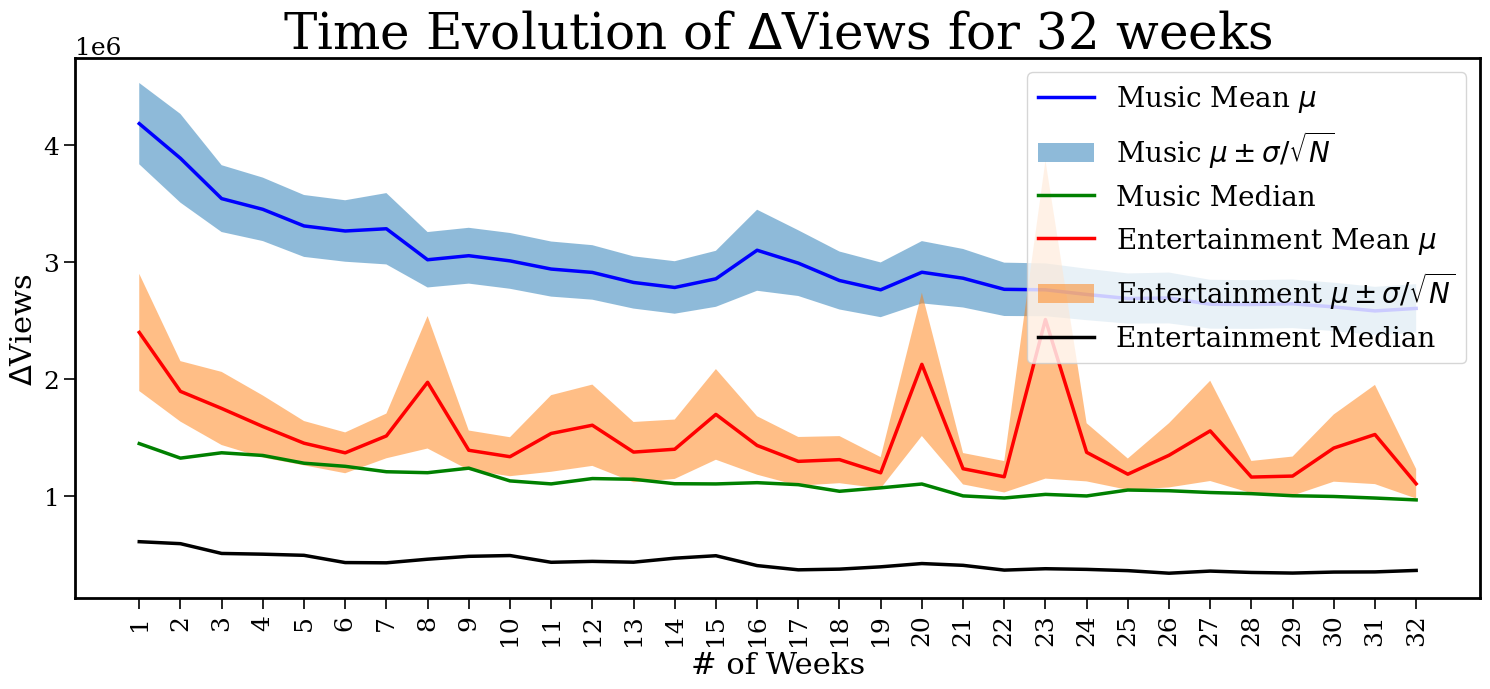

In [331]:
# Plot Delta_views Evolution for time periods 1 (4 weeks) to 8 months (32 weeks) following upload of a video
Part4_Utils.plot_metric_values_all_weeks(df_delta_views_list)

On the graphs given above, we see that for both Music and Entertainment there is a decreasing trend in $\Delta \textrm{Views}$ for all values of $n_{weeks}$ following the upload of one video. The decrease seems to stabilize at around 300'000 for Music and at approximately 150'000 for Entertainment, though further datapoints would be needed to confirm this.\
In the Entertainment category, we notice some spikes in mean $\Delta \textrm{Views}$ especially for higher $n_{weeks}$. The bigger spikes occur at 20 and 23 weeks, which is (very) roughly 5 and 6 months. In the supplementary material, these plots are given with the median. The median does not display the same spikes as the mean so this behavior is most probably caused by outliers with very high $\Delta \textrm{Views}$ that pull the mean upwards.

We observe that the mean $\Delta \textrm{Views}$ of Music is always higher than Entertainment (even taking into account the uncertainty range). This is somewhat surprising as in section 4.1) Entertainment had higher mean $\Delta \textrm{Views}$ than Music. Therefore, once a Music video has been uploaded, on average it has a higher response in $\Delta \textrm{Views}$ than an Entertainment video. Graphically, the decay rates of $\Delta \textrm{Views}$ look similar, but the curve should be fitted to validate this statement.

TODO: fit different functions to find best fit???

## 4.3) Return Times and Decay Rates

This section adresses return times and decay rates of peaks detected in the $\Delta \textrm{Views}$ time-series. Peaks are detected using the find_peaks() method from scipy. Peaks are retained if they have a prominence of 30% above the baseline value, which is defined as the rolling average of $\Delta \textrm{Views}$ of a given channel over a specified number of weeks.

Return times are defined as the number of weeks after a peak until which $\Delta \textrm{Views}$ drops below a certain threshold. This threshold is chosen as 10% above the baseline value. Once we have calculated these return times, we can either average them for each channel and then draw the histogram of average channel return times, or simply plot the histogram of all return times. Both options are shown below for Music and Entertainment, which allows us to compare both categories. In addition, we also print the average and standard deviation of return times, the proportion of peaks that return to baseline and the number of peaks for both categories.

In [ ]:
# Calculate return times for peaks that return to baseline for Music and Entertainment
mod_return_times_music = Part4_Utils.modified_return_to_baseline_analysis(df_time_series_music, metric='delta_views', max_return_time=20, prom_percent=0.3, 
                                                                          baseline_window=4, tolerance=0.1)

mod_return_times_entertainment = Part4_Utils.modified_return_to_baseline_analysis(df_time_series_entertainment, metric='delta_views', max_return_time=20, 
                                                                                  prom_percent=0.3, baseline_window=4, tolerance=0.1)

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:489: RuntimeWarning: Mean of empty slice
  'avg_return_time': results_df['avg_return_time'].mean(),
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:489: RuntimeWarning: Mean of empty slice
  'avg_return_time': results_df['avg_return_time'].mean(),
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:489: RuntimeWarning: Mean of empty slice
  'avg_return_time': results_df['avg_return_time'].mean(),
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:489: RuntimeWarning: Mean of empty slice
  'avg_return_time': results_df['avg_return_time'].mean(),
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:489: RuntimeWarning: Mean of empty slice
  'avg_return_time': res

Music Mean Channel Average Return Time: 1.71 Weeks
Music Standard Deviation of Mean Return Time: 0.00003 Weeks
Music Mean Return Time: 1.68
Music propotion of return: 94.28%
Number of Music Peaks: 209760 

Entertainment Mean Channel Average Return Time: 1.67 Weeks
Entertainment Standard Deviation of Mean Return Time: 0.00002 Weeks
Entertainment Mean Return Time: 1.63
Entertainment propotion of return: 94.00%
Number of Entertainment Peaks: 259085


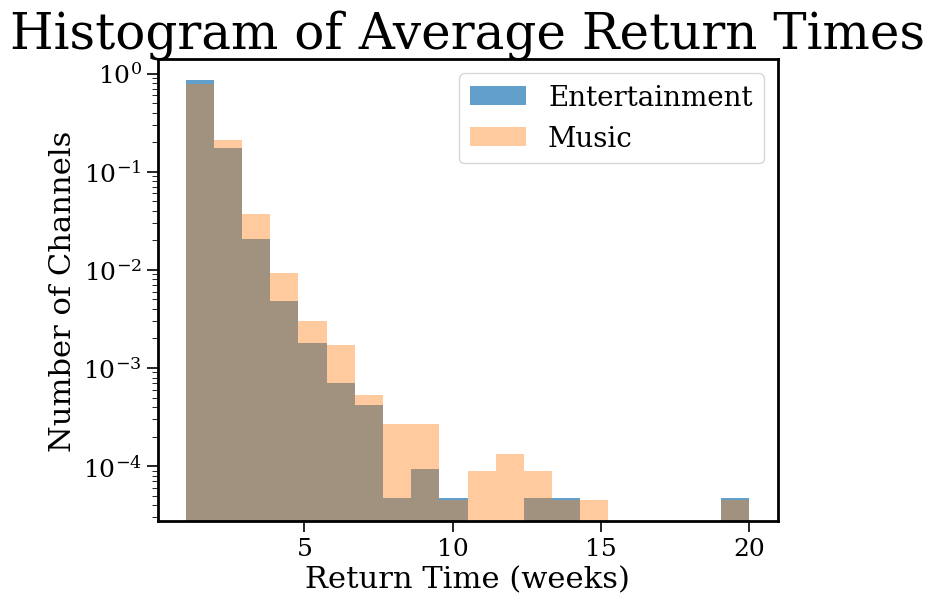

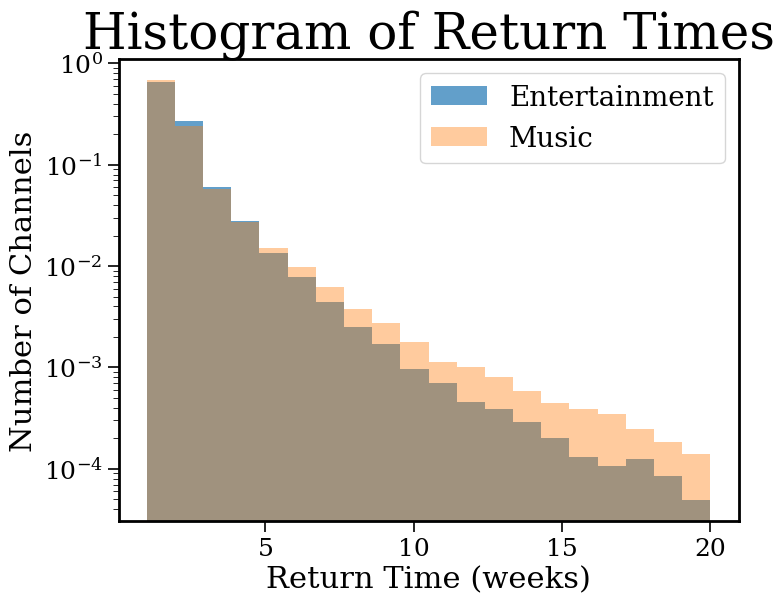

In [343]:
# Plot results and Histograms for return times of peaks that return to baseline
Part4_Utils.return_times_results_and_histograms(mod_return_times_music, mod_return_times_entertainment)

The mean return times printed above seem to indicate that peaks in Music channel time-series have longer return times than Entertainment channels. Indeed, the Mean Channel Average Return Time and the Mean Return Time are both greater for Music than for Entertainment, regardless of if we take into account the standard error of the mean.

In [252]:
# Calculate decay rates between peaks that return to baseline for Music and Entertainment
mod_music_decay_rates = Part4_Utils.modified_calculate_decay_rates_between_peaks(df_time_series_music, metric='delta_views', baseline_window=4, 
                                                                                 prom_percent=0.3, tolerance=0.1)
mod_ent_decay_rates = Part4_Utils.modified_calculate_decay_rates_between_peaks(df_time_series_entertainment, metric='delta_views', baseline_window=4, 
                                                                               prom_percent=0.3, tolerance=0.1)

Music Average Decay Rate: 0.13030235920944733
Music Standard deviation of Decay Rate: 0.11147945918320896
Number of Peaks for Music: 21386
Entertainment Average Decay Rate: 0.16229298595975422
Entertainment Standard deviation of Decay Rate: 0.11989903914971767
Number of Peaks for Entertainment: 25922


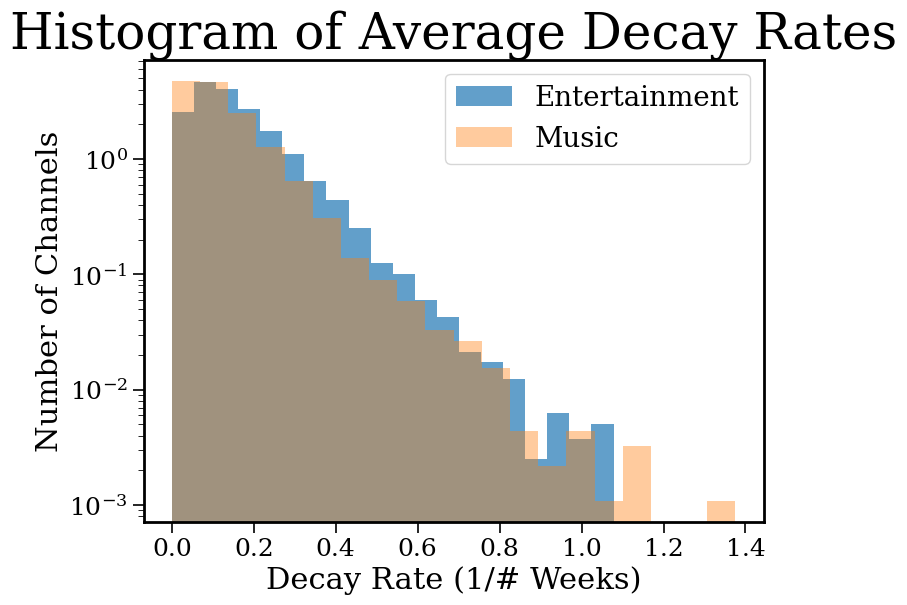

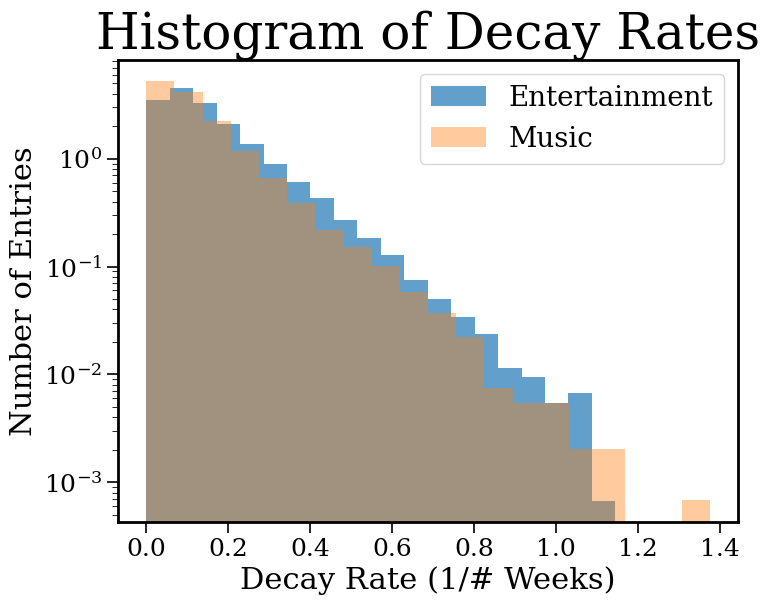

In [253]:
# Plot results and histograms of decay rates between peaks that return to baseline for Music and Entertainment
Part4_Utils.decay_rates_results_and_histograms(mod_music_decay_rates, mod_ent_decay_rates)

In [193]:
# Calculate peak heights for Music and Entertainment
music_peaks = Part4_Utils.calculate_peak_heights_baseline(df_time_series_music, metric='delta_views', baseline_window=4, prom_percent=0.3)
ent_peaks = Part4_Utils.calculate_peak_heights_baseline(df_time_series_entertainment, metric='delta_views', baseline_window=4, prom_percent=0.3)

Number of Peaks for Music: 205280
Number of Peaks for Entertainment: 253841


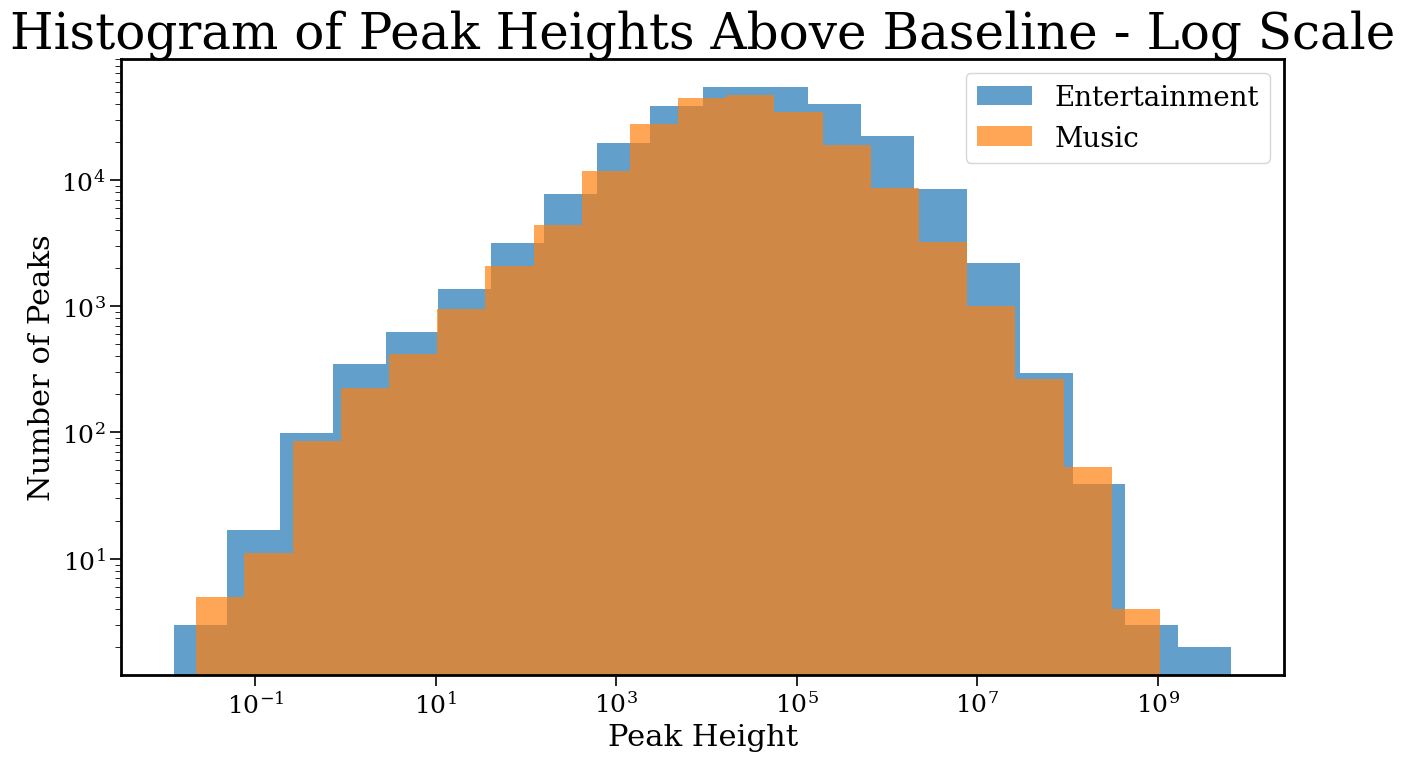

In [194]:
# Plot Histogram of peak heights
Part4_Utils.peak_heights_histogram(music_peaks, ent_peaks)

## Repeat Analysis for Top Channels

In [45]:
# Load channels DataFrame
df_channels = df_channels = pd.read_csv(f"{DATA_PATH}/channels.tsv.gz", sep="\t", compression="gzip")
print(len(df_channels))
df_channels.head()

136470


category_cc   join_date                   channel  \
0         Gaming  2010-04-29  UC-lHJZR3Gqxm24_Vd_AJ5Yw   
1      Education  2006-09-01  UCbCmjCuTUZos6Inko4u57UQ   
2  Entertainment  2006-09-20  UCpEhnqL0y41EpW2TvWAHD7Q   
3  Howto & Style  2016-11-15  UC295-Dw_tDNtZXFeAPAW6Aw   
4         Sports  2007-05-11  UCJ5v_MCY6GNUBTO8-D3XoAg   

                   name_cc  subscribers_cc  videos_cc  subscriber_rank_sb  \
0                PewDiePie       101000000       3956                 3.0   
1  Cocomelon - Nursery ...        60100000        458                 7.0   
2                SET India        56018869      32661                 8.0   
3          5-Minute Crafts        60600000       3591                 9.0   
4                      WWE        48400000      43421                11.0   

   weights  
0    2.087  
1    2.087  
2    2.087  
3    2.087  
4    2.087

In [ ]:
# Filtered Music and Entertainment DataFrames
df_filtered_music, df_filtered_entertainment = Part4_Utils.filter_and_categorize(df_channels, df_time_series, p_threshold=0.75, top=True)

In [ ]:
# Basic stats for filtered time-series DataFrames for Music and Entertainment categories
# Music
Part4_Utils.basic_stats(df_filtered_music, category='Music')

# Entertainment
Part4_Utils.basic_stats(df_filtered_entertainment, category='Entertainment')

Number of entries for Music category: 269598
Number of entries for Music with delta_videos >= 1: 102420       (37.99% of total)
Number of entries for Entertainment category: 360801
Number of entries for Entertainment with delta_videos >= 1: 231099       (64.05% of total)


c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.xlabel('Time')
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:231: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.tight_layout()


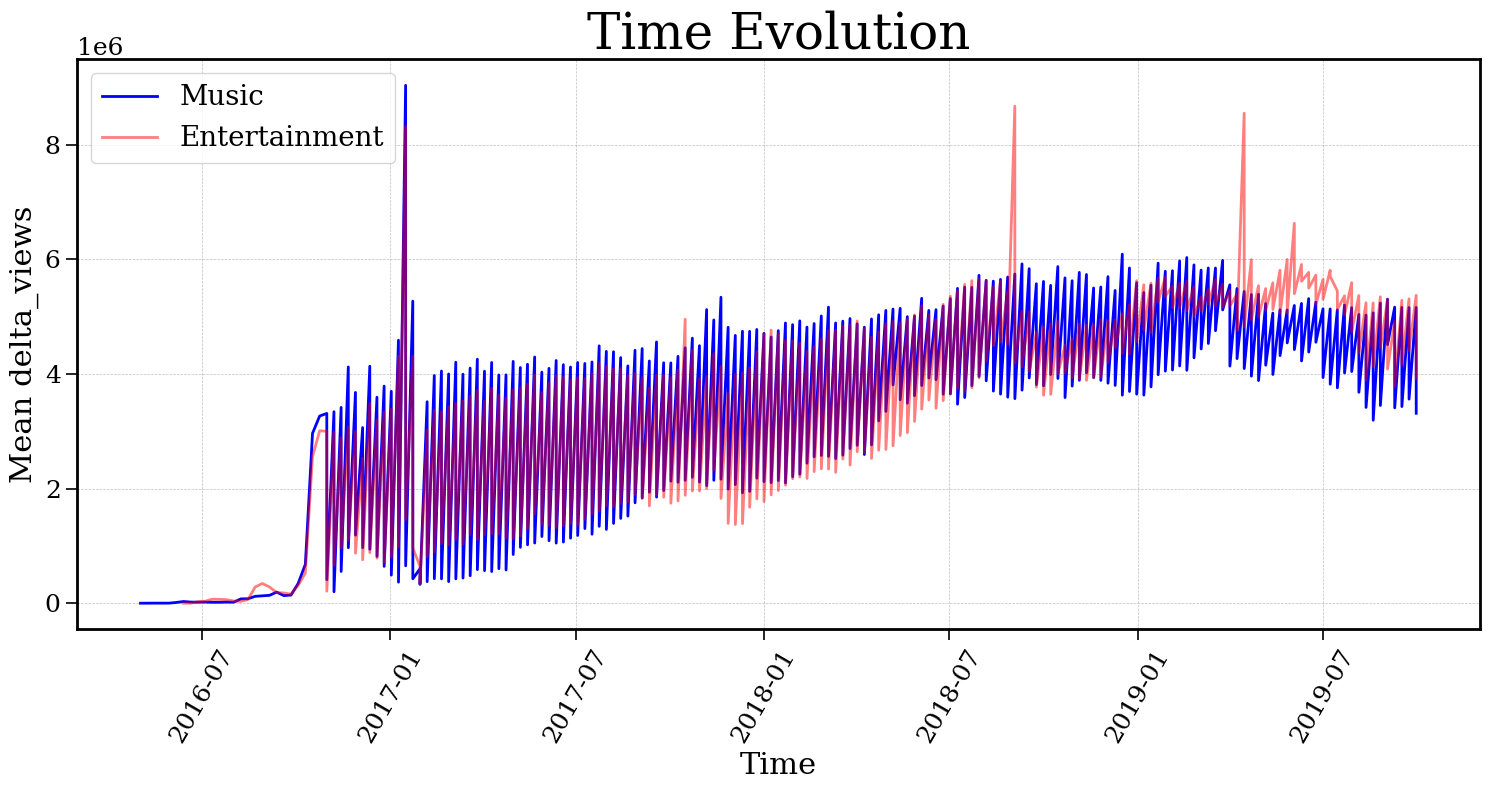

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.xlabel('Time')
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:231: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.tight_layout()


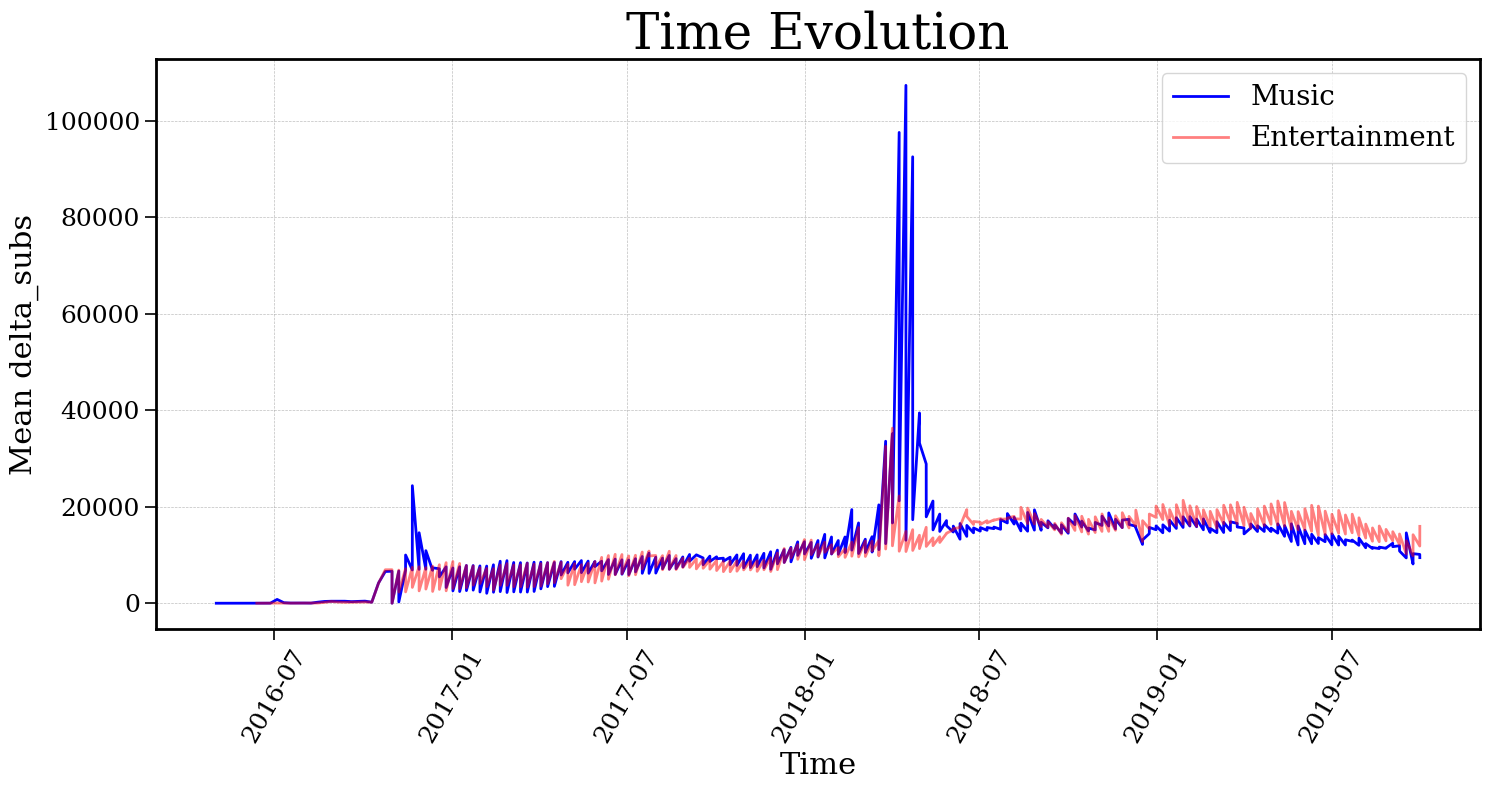

In [64]:
# Time Evolution of delta_views mean
Part4_Utils.plot_general_mean(df_filtered_music, df_filtered_entertainment, metric='delta_views')

# Time Evolution of delta_subs mean
Part4_Utils.plot_general_mean(df_filtered_music, df_filtered_entertainment, metric='delta_subs')

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.xlabel('Time')
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:273: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.tight_layout()


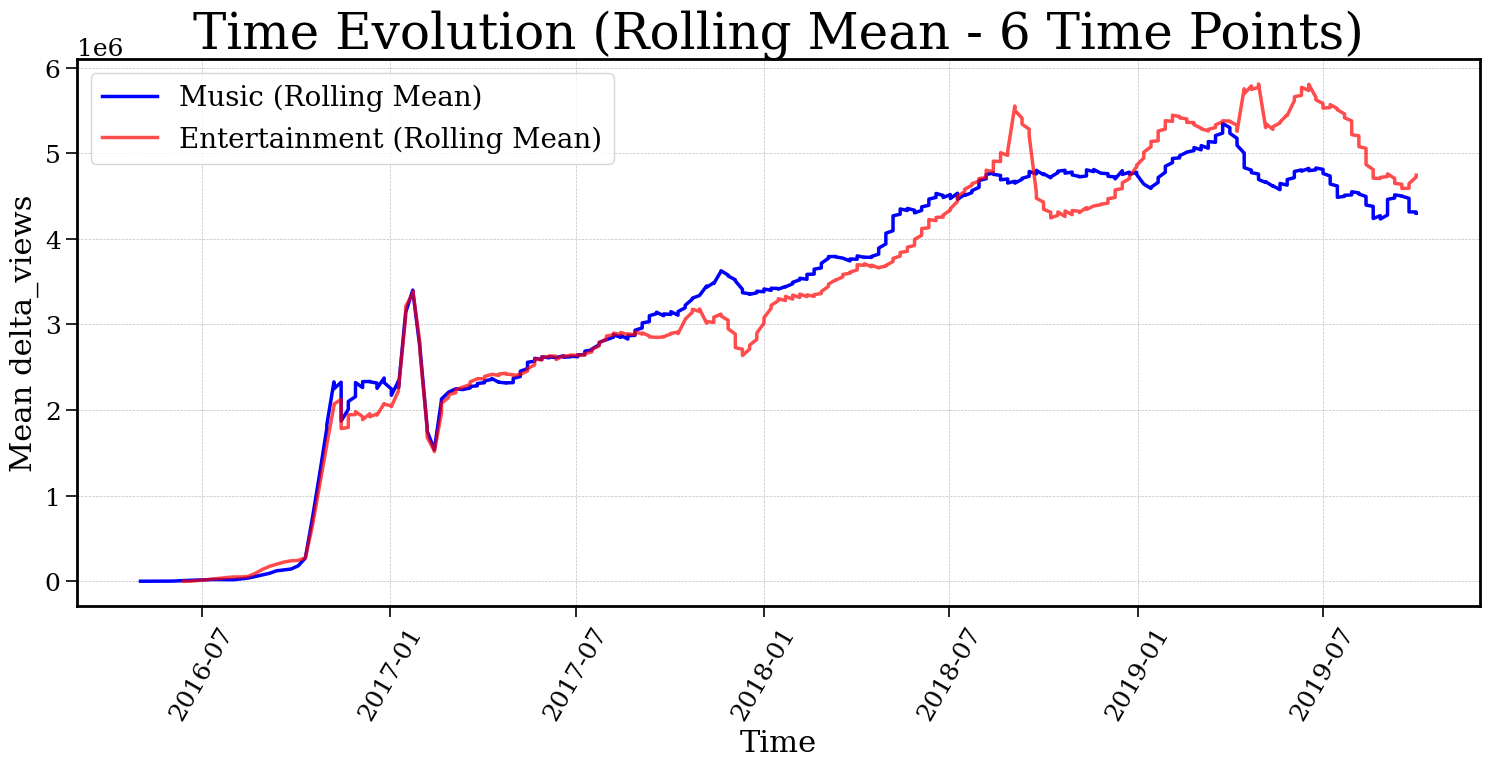

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.xlabel('Time')
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:273: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.tight_layout()


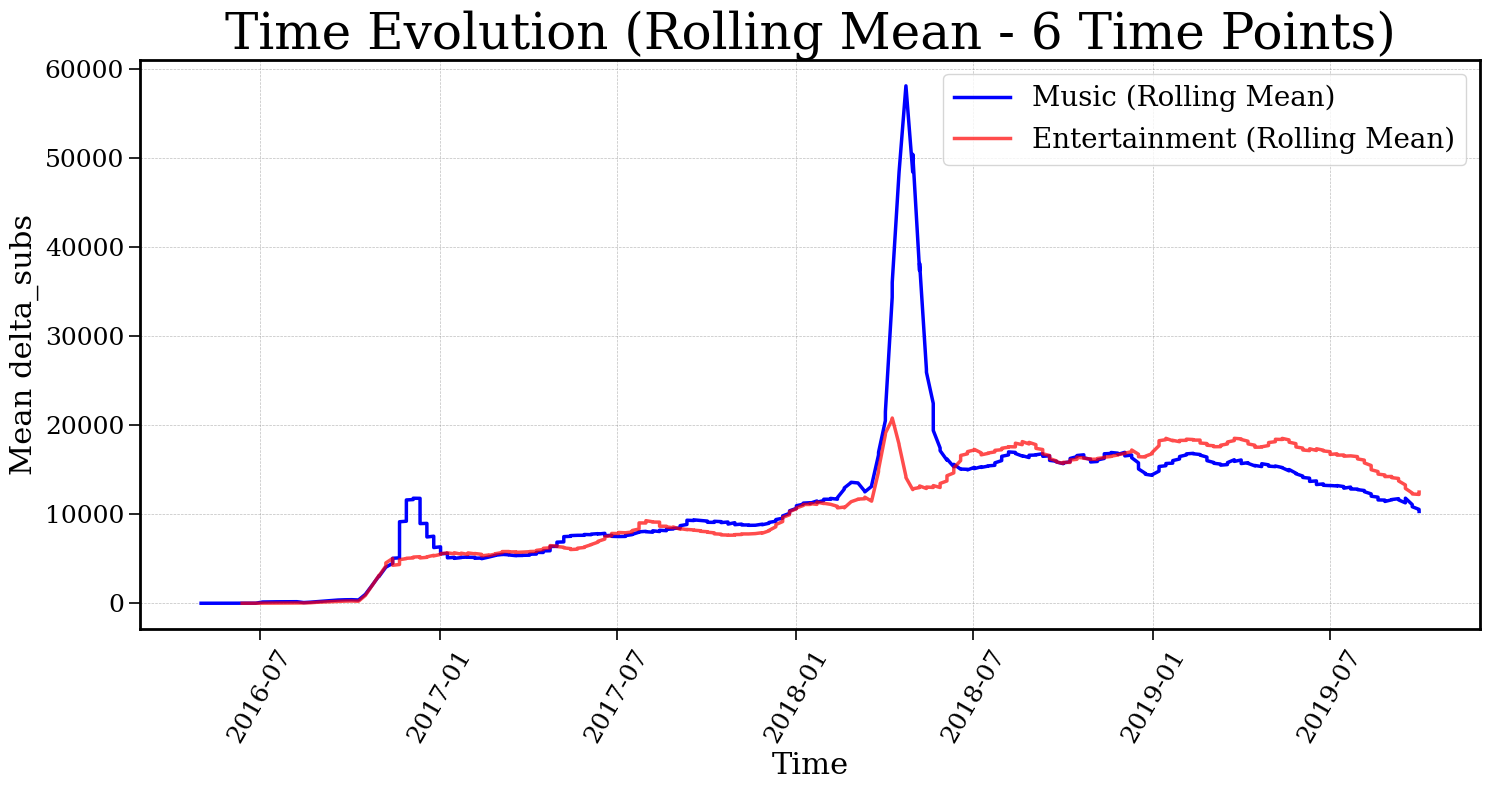

In [65]:
# Rolling average of time evolution of delta_views mean
Part4_Utils.plot_general_rolling_mean(df_filtered_music, df_filtered_entertainment, metric='delta_views', rolling_window=6)

# Rolling average of time evolution of delta_subs mean
Part4_Utils.plot_general_rolling_mean(df_filtered_music, df_filtered_entertainment, metric='delta_subs', rolling_window=6)

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.xlabel('Time')
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:231: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.tight_layout()


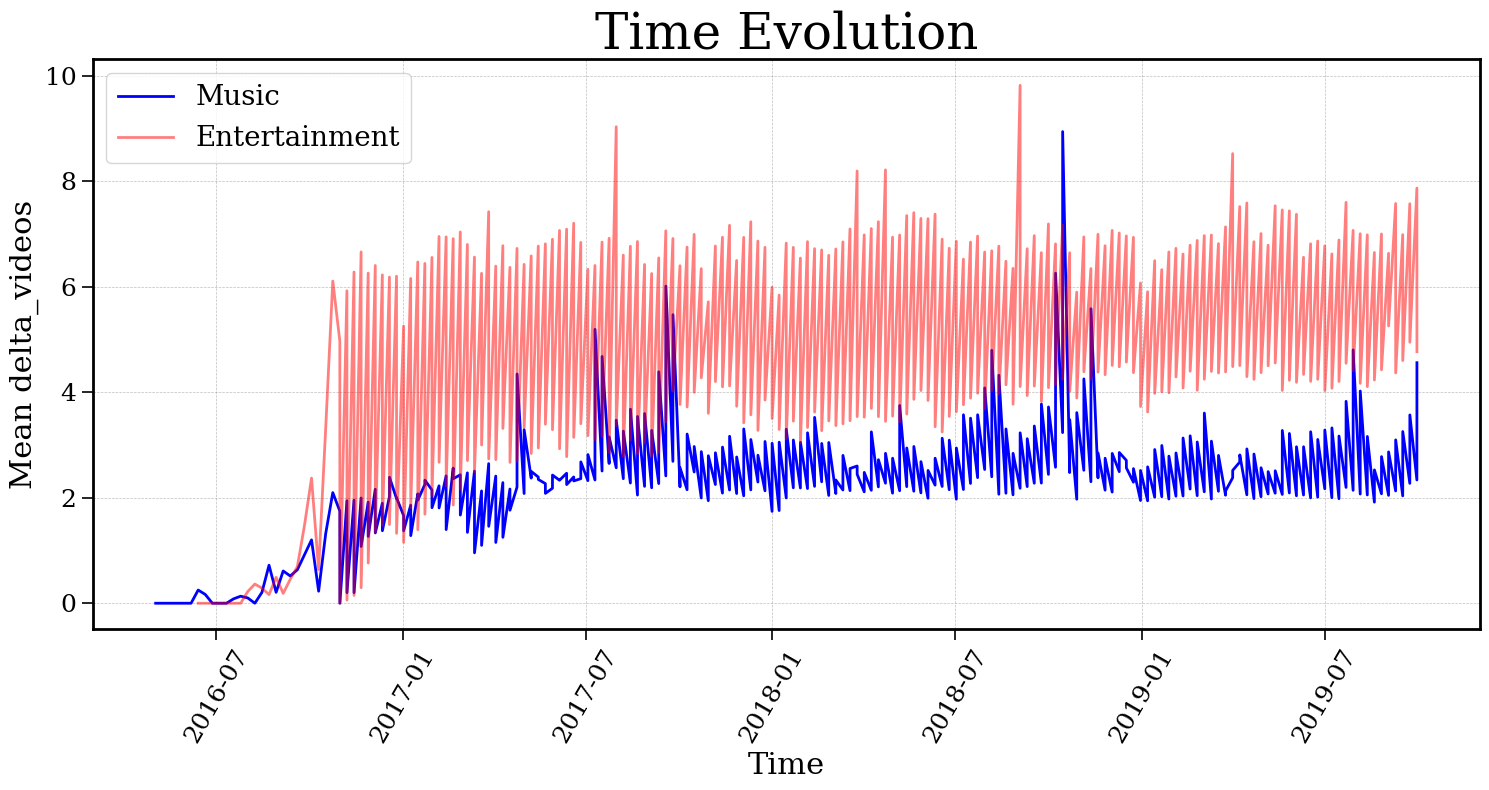

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.xlabel('Time')
c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:273: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.tight_layout()


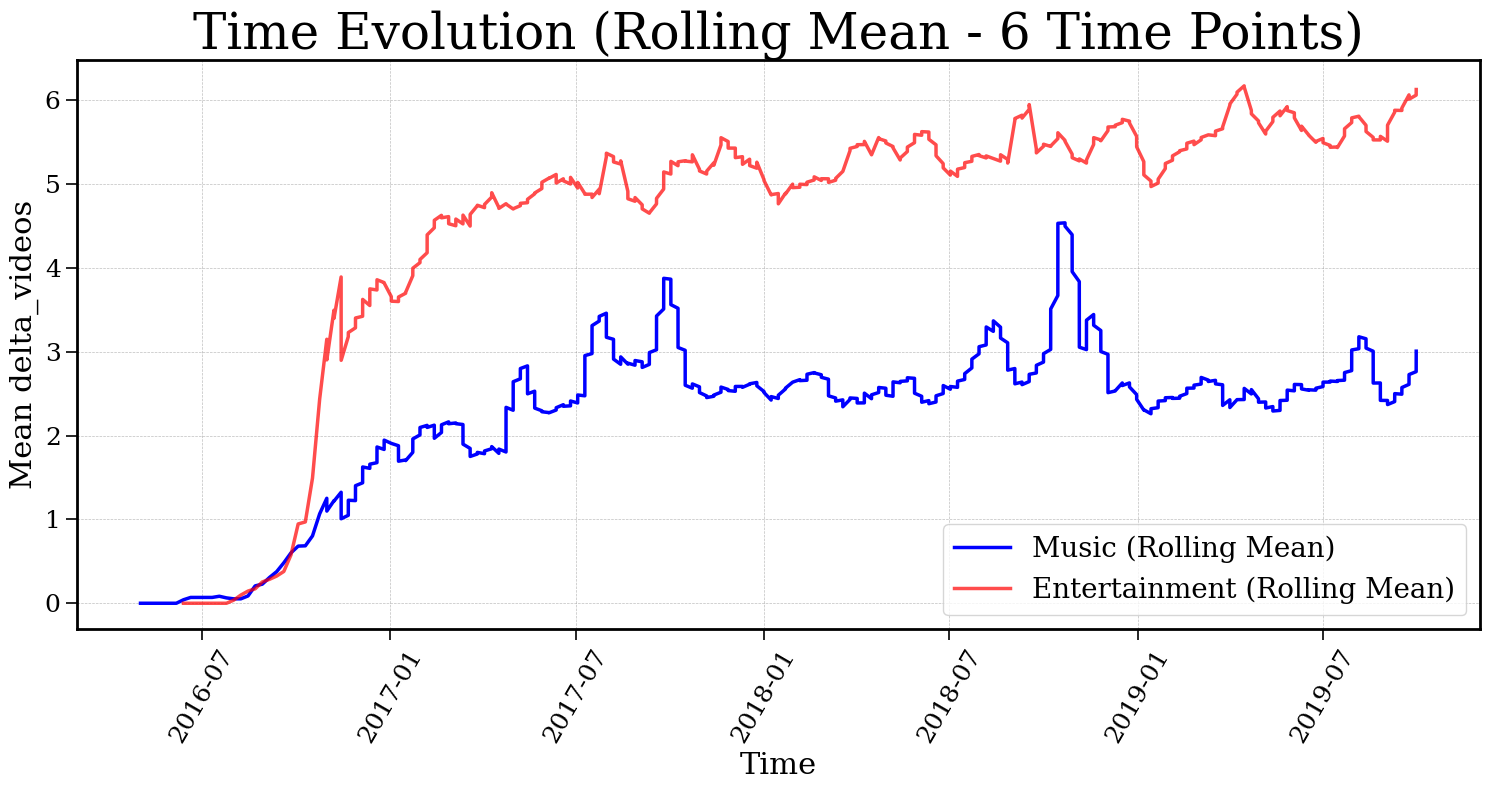

In [66]:
# Time Evolution of delta_videos mean
Part4_Utils.plot_general_mean(df_filtered_music, df_filtered_entertainment, metric='delta_videos')

# Rolling average of time Evolution of delta_videos mean
Part4_Utils.plot_general_rolling_mean(df_filtered_music, df_filtered_entertainment, metric='delta_videos', rolling_window=6)

In [67]:
# Calculate Delta_views Evolution for time periods 1 (4 weeks) to 8 months (32 weeks) following upload of a video
weeks = [4, 8, 12, 16, 20, 24, 28, 32]
df_delta_views_list = Part4_Utils.calculate_metric_values_all_weeks(df_filtered_music, df_filtered_entertainment, weeks=weeks, metric='delta_views')

Number of initial video entries for n_weeks = 4: 40141
Number of valid entries for n_weeks = 4: 7001
Number of initial video entries for n_weeks = 4: 70392
Number of valid entries for n_weeks = 4: 4731
Number of initial video entries for n_weeks = 8: 40141
Number of valid entries for n_weeks = 8: 3471
Number of initial video entries for n_weeks = 8: 70392
Number of valid entries for n_weeks = 8: 1948
Number of initial video entries for n_weeks = 12: 40141
Number of valid entries for n_weeks = 12: 2216
Number of initial video entries for n_weeks = 12: 70392
Number of valid entries for n_weeks = 12: 1150
Number of initial video entries for n_weeks = 16: 40141
Number of valid entries for n_weeks = 16: 1515
Number of initial video entries for n_weeks = 16: 70392
Number of valid entries for n_weeks = 16: 781
Number of initial video entries for n_weeks = 20: 40141
Number of valid entries for n_weeks = 20: 1150
Number of initial video entries for n_weeks = 20: 70392
Number of valid entries fo

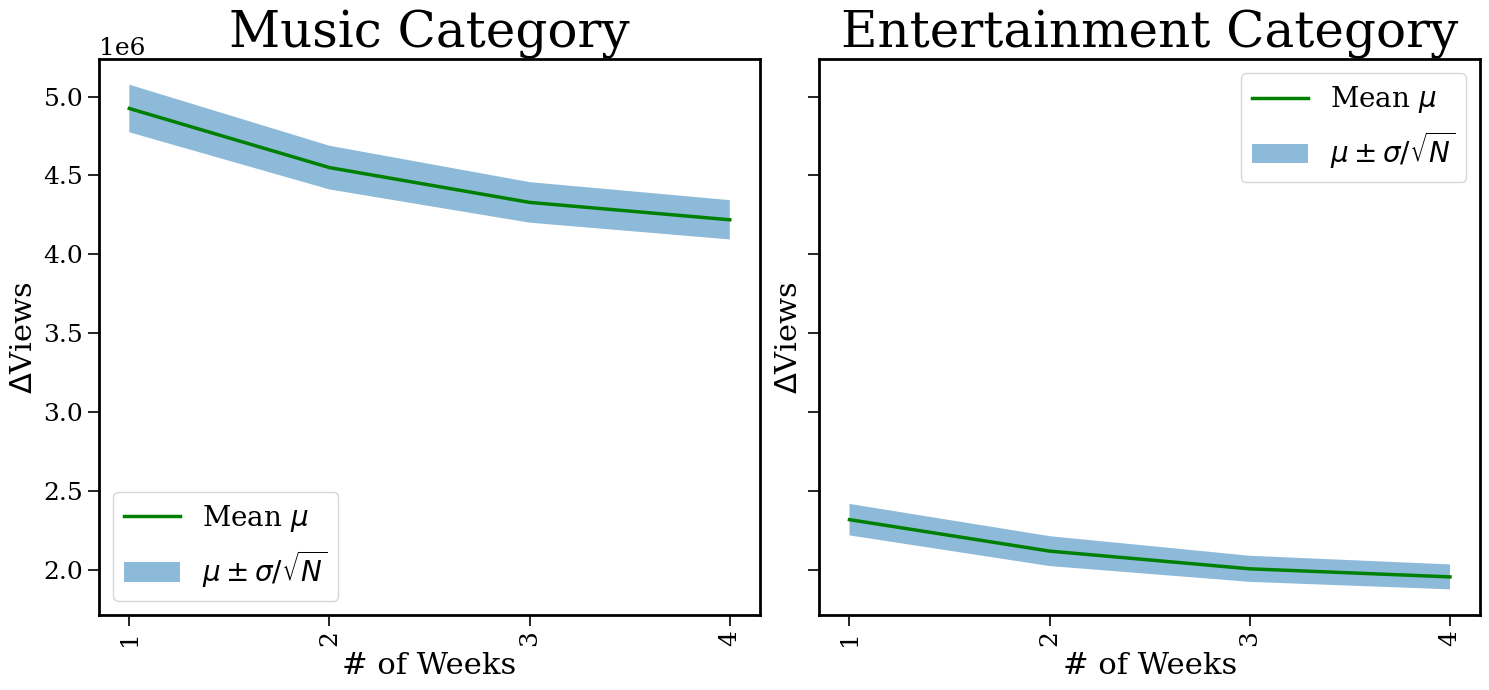

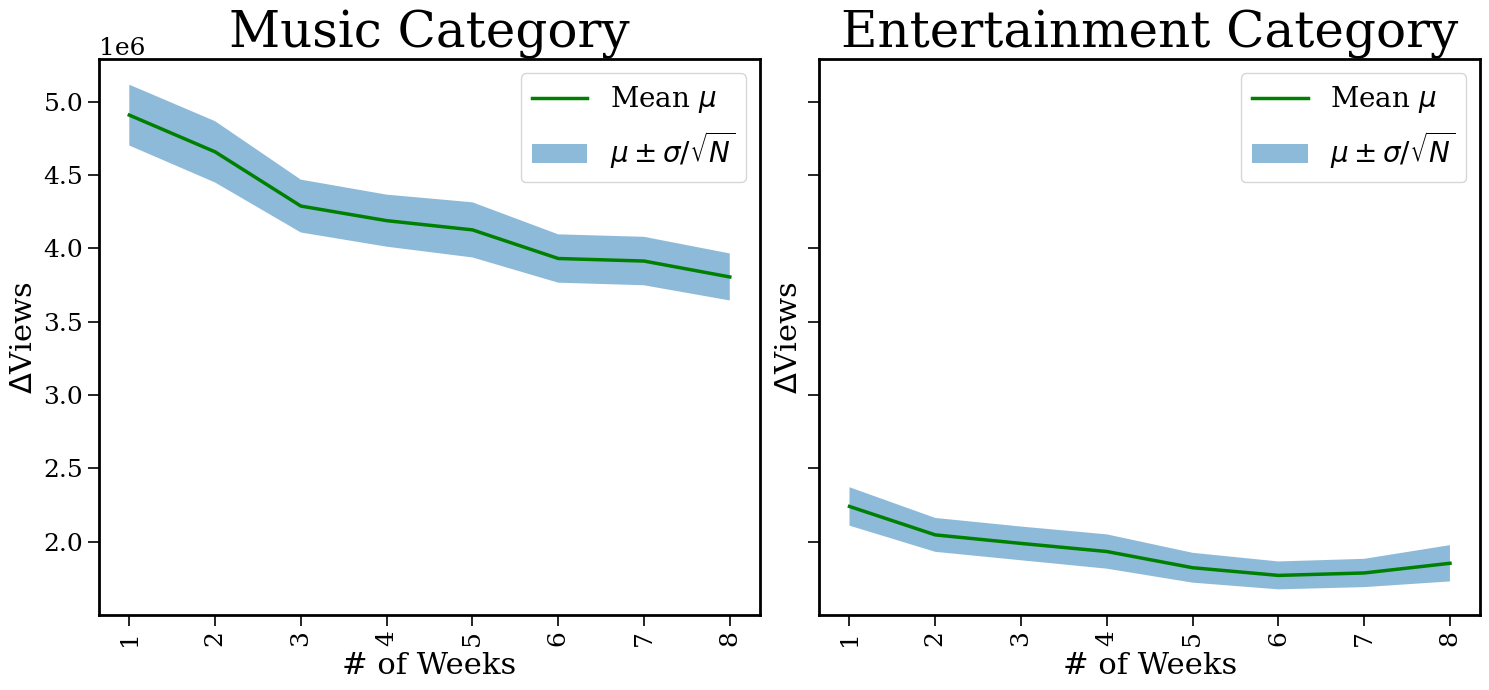

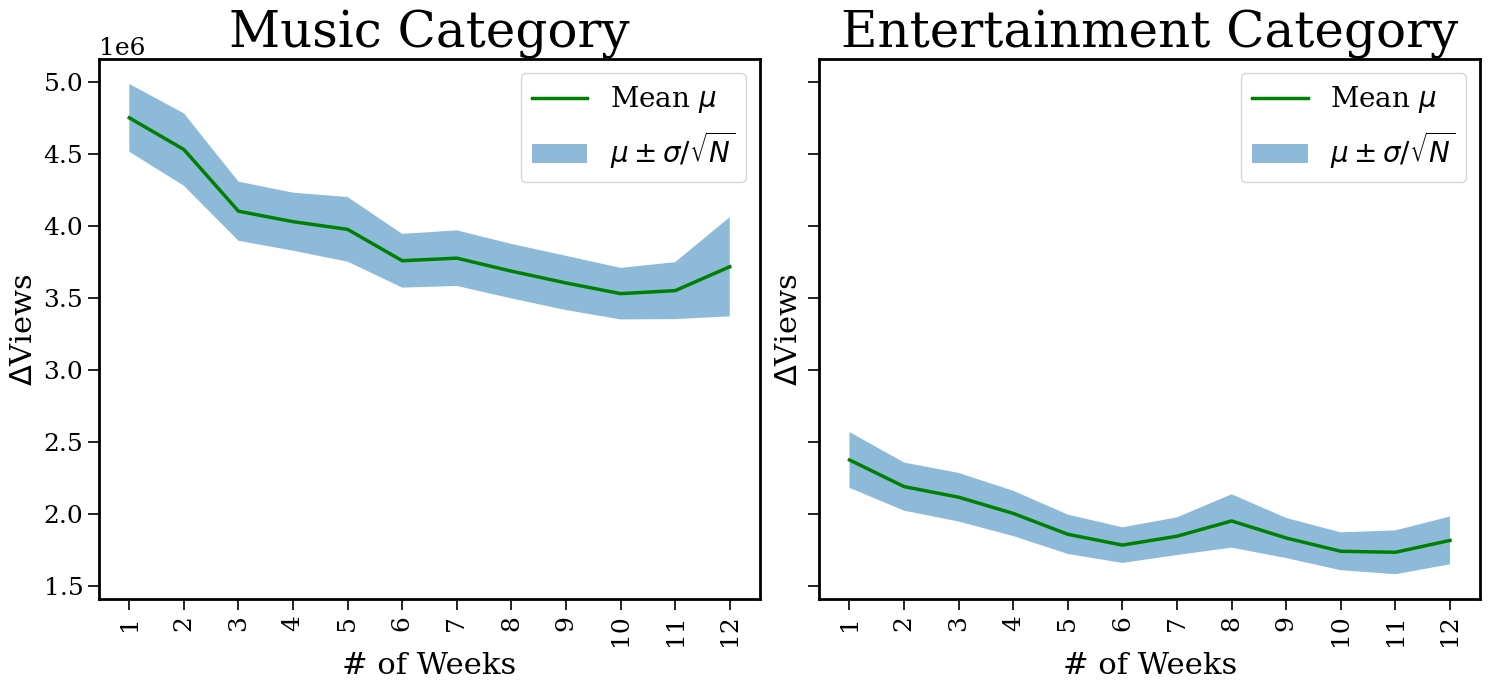

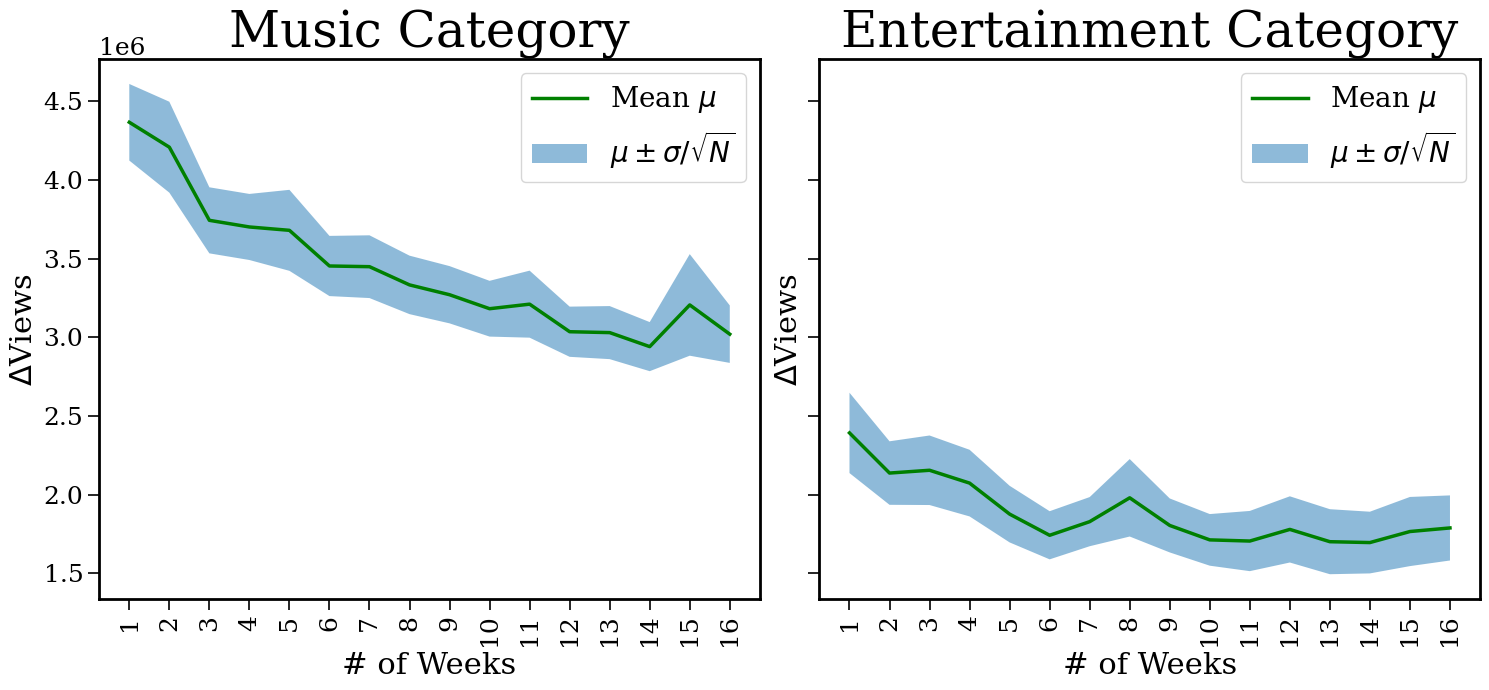

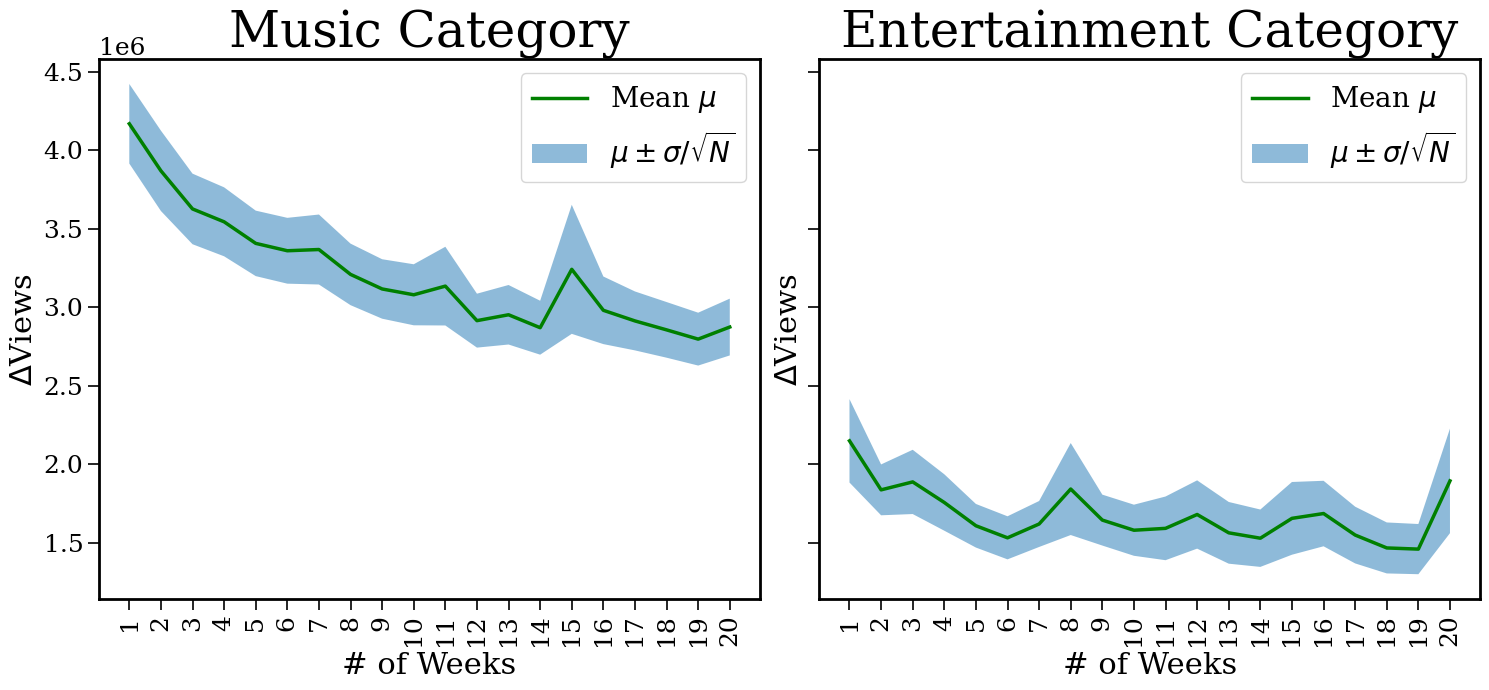

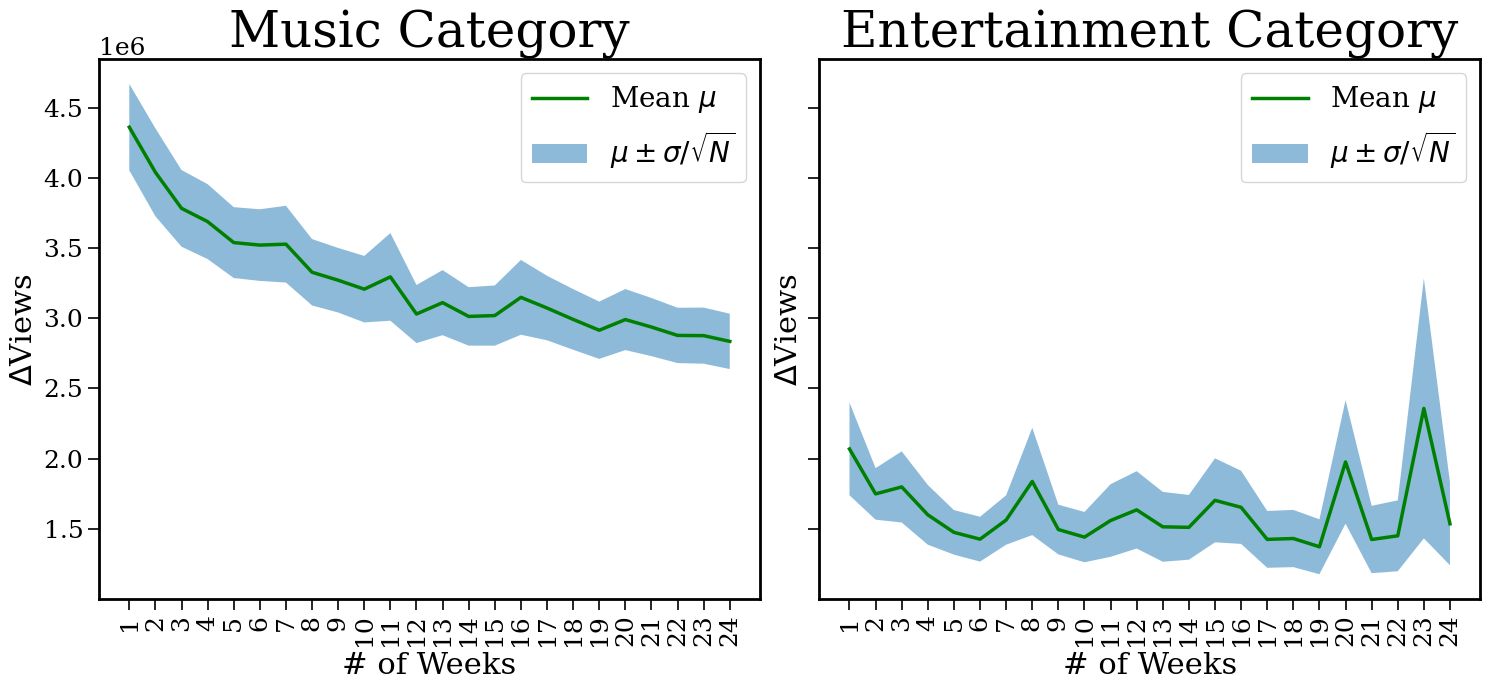

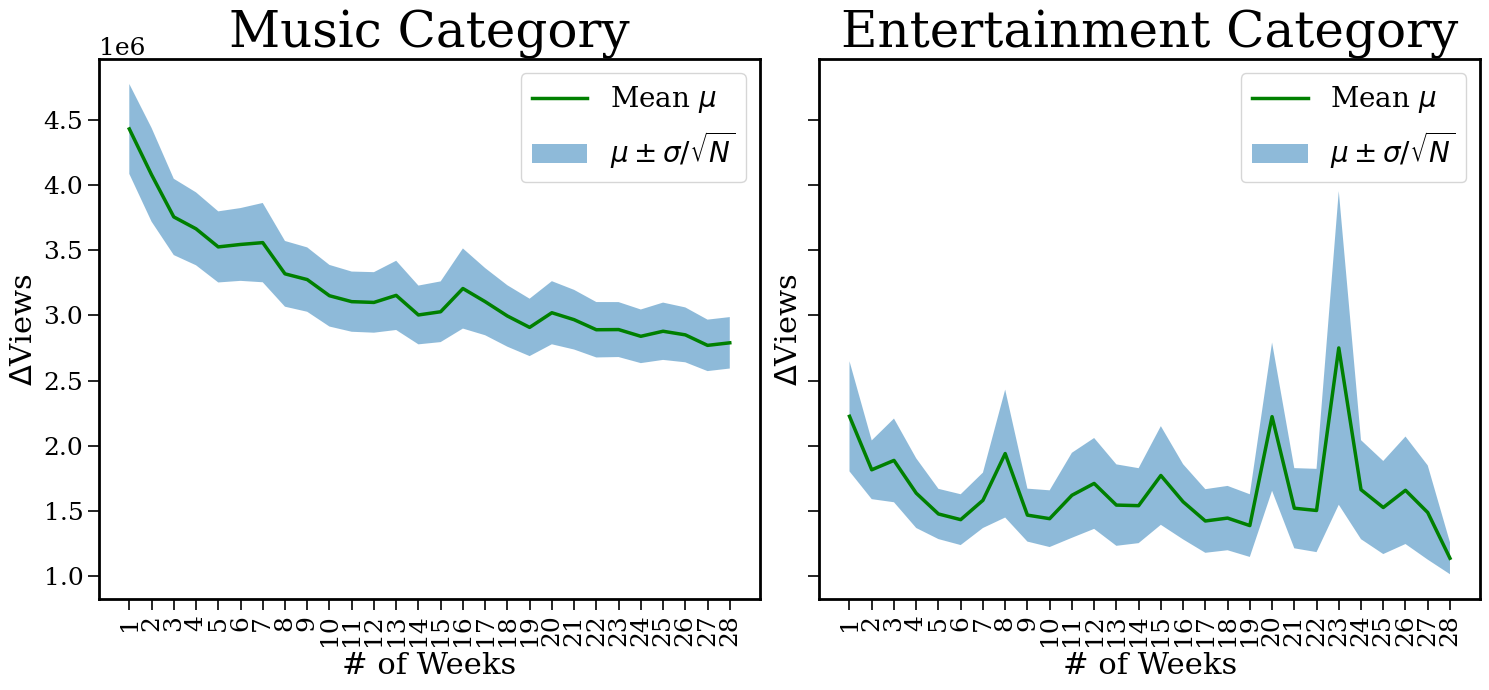

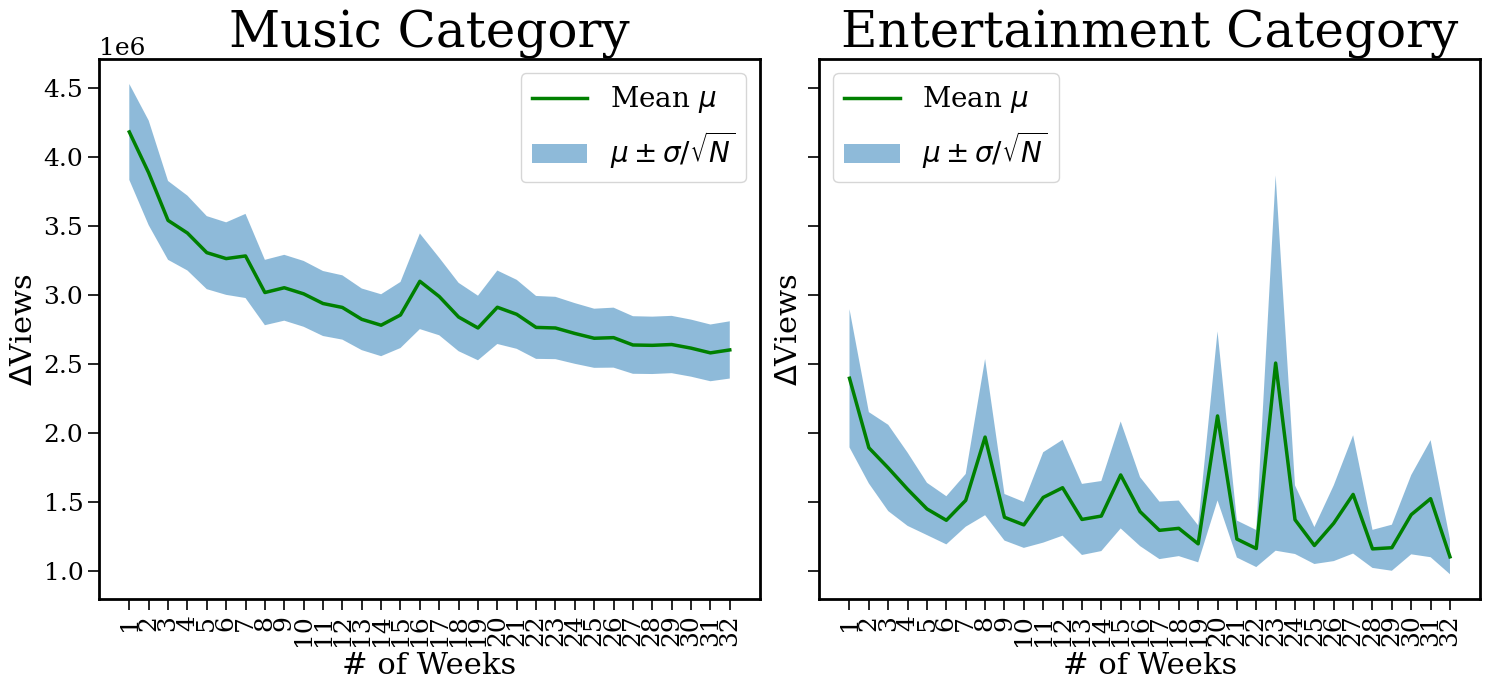

In [68]:
# Plot Delta_views Evolution for time periods 1 (4 weeks) to 8 months (32 weeks) following upload of a video
Part4_Utils.plot_metric_values_all_weeks(df_delta_views_list)

In [236]:
# Calculate return times for Music and Entertainment
return_times_music_filtered = Part4_Utils.return_to_baseline_analysis(df_filtered_music, metric='delta_views', max_return_time=20, 
                                                                      tolerance=0.1, prom_percent=0.3)
return_times_entertainment_filtered = Part4_Utils.return_to_baseline_analysis(df_filtered_entertainment, metric='delta_views', max_return_time=20, 
                                                                              tolerance=0.1, prom_percent=0.3)

Music Average return time: 1.8877337142877089
Music Standard deviation of return time: 0.73268483247036
Music propotion of return:  0.9778664189313915
Entertainment Average return time: 1.8903619951276804
Entertainment Standard deviation of return time: 0.6121905539720058
Entertainment propotion of return:  0.9731697892560854


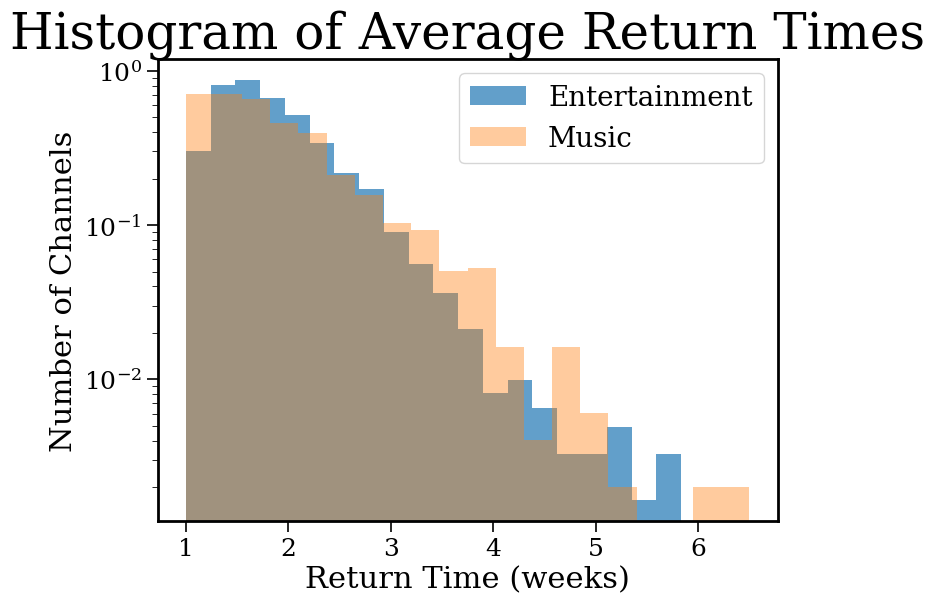

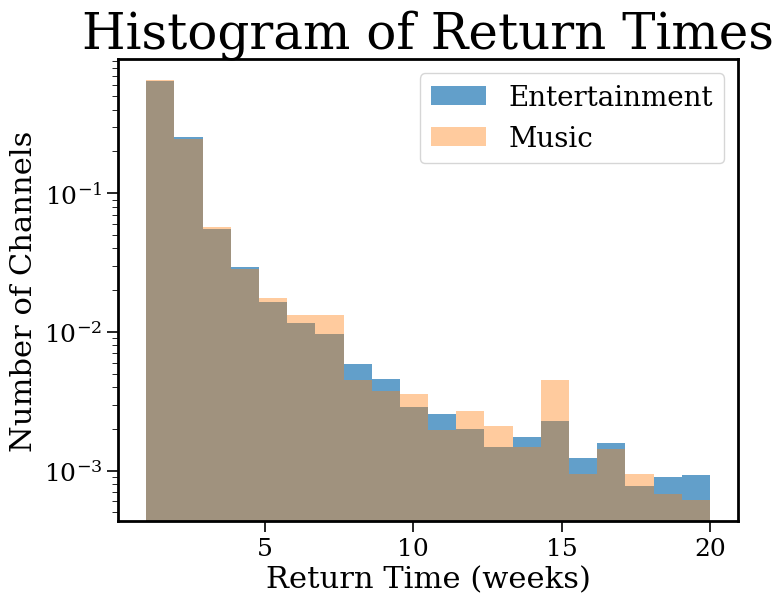

Number of Music Peaks: 15524
Number of Entertainment Peaks: 33871


In [237]:
# Plot results and Histograms for return times 
Part4_Utils.return_times_results_and_histograms(return_times_music_filtered, return_times_entertainment_filtered)

In [238]:
# Calculate return times for peaks that return to baseline for Music and Entertainment
mod_return_times_music_filtered = Part4_Utils.modified_return_to_baseline_analysis(df_filtered_music, metric='delta_views', max_return_time=20, 
                                                                                   tolerance=0.1, prom_percent=0.3)
mod_return_times_entertainment_filtered = Part4_Utils.modified_return_to_baseline_analysis(df_filtered_entertainment, metric='delta_views', max_return_time=20, 
                                                                                           tolerance=0.2, prom_percent=0.3)

Music Average return time: 1.7049366542042372
Music Standard deviation of return time: 0.5903884500634001
Music propotion of return:  0.9585405274482875
Entertainment Average return time: 1.3999573418343387
Entertainment Standard deviation of return time: 0.3670152669779957
Entertainment propotion of return:  0.959065768510519


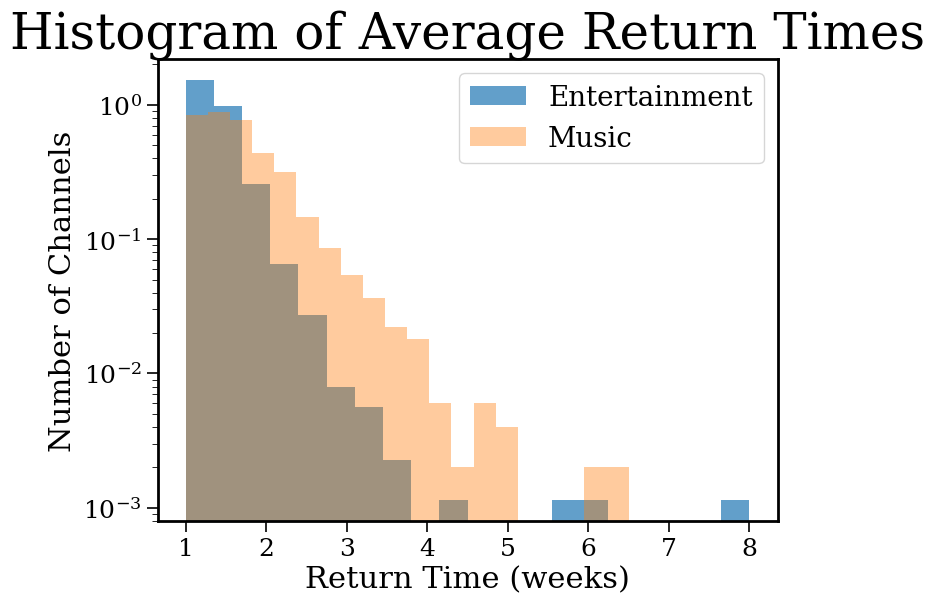

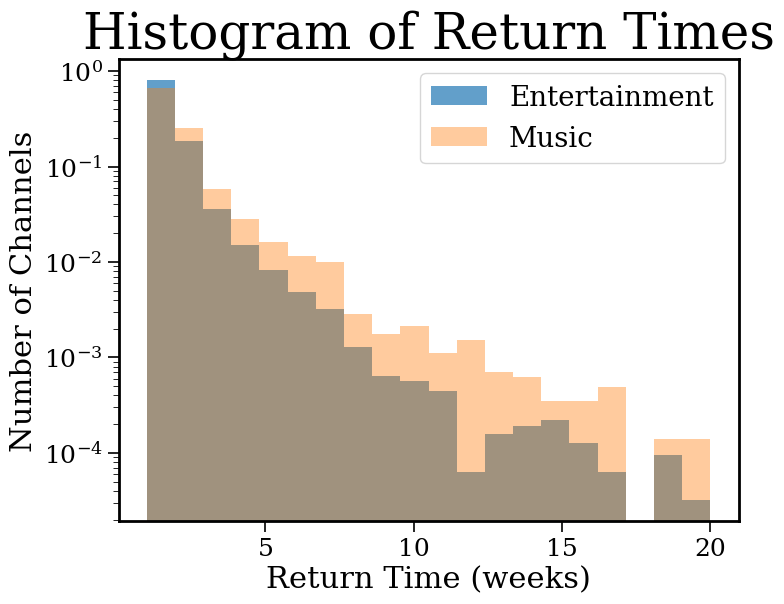

Number of Music Peaks: 15142
Number of Entertainment Peaks: 33253


In [239]:
# Plot results and Histograms for return times of peaks that return to baseline
Part4_Utils.return_times_results_and_histograms(mod_return_times_music_filtered, mod_return_times_entertainment_filtered)

In [73]:
# Calculate decay rates between peaks for Music and Entertainment
music_decay_rates_filtered = Part4_Utils.calculate_decay_rates_between_peaks(df_filtered_music, metric='delta_views')
ent_decay_rates_filtered = Part4_Utils.calculate_decay_rates_between_peaks(df_filtered_entertainment, metric='delta_views')

Music Average Decay Rate: 0.04372975273345228
Music Standard deviation of Decay Rate: 0.0404584999003431
Number of Peaks for Music: 32326
Entertainment Average Decay Rate: 0.0745756334024196
Entertainment Standard deviation of Decay Rate: 0.06095584695218726
Number of Peaks for Entertainment: 42880


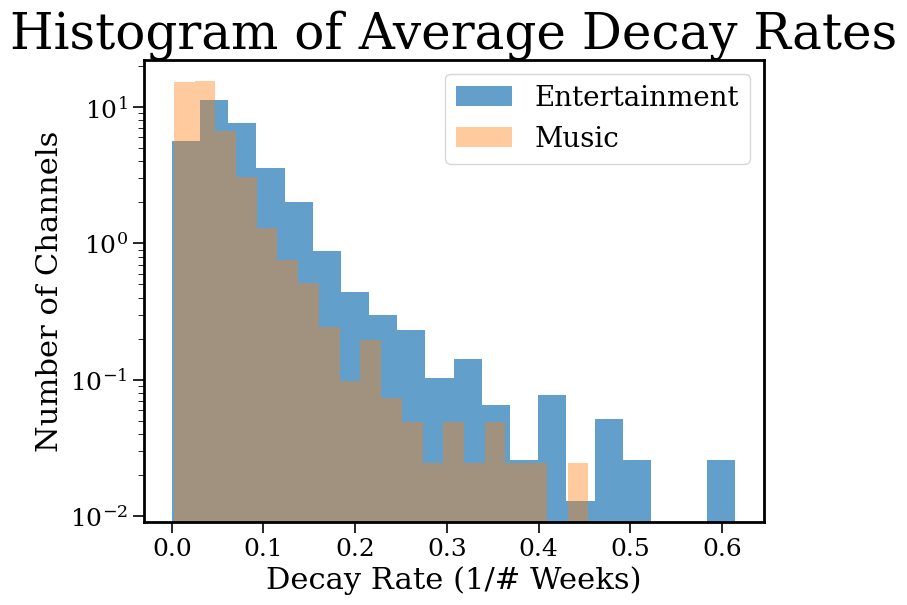

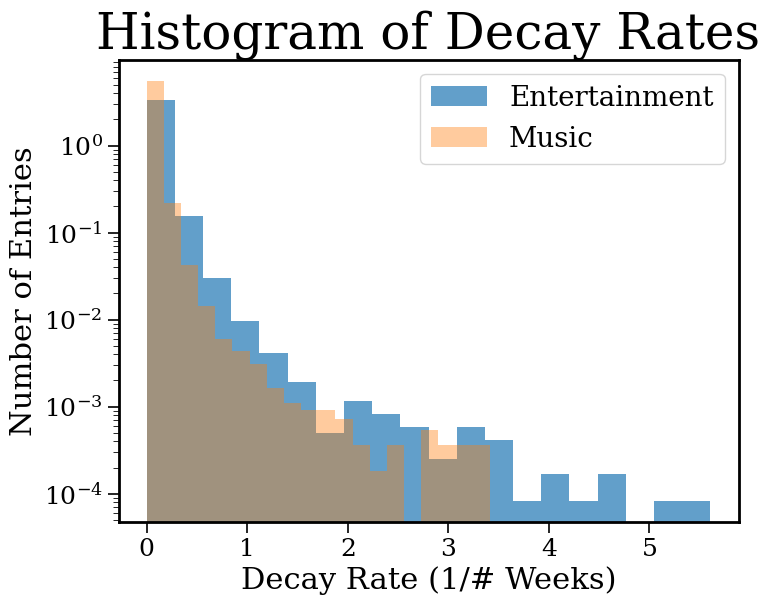

In [74]:
# Plot results and histograms of decay rates between peaks for Music and Entertainment
Part4_Utils.decay_rates_results_and_histograms(music_decay_rates_filtered, ent_decay_rates_filtered)

In [240]:
# Calculate decay rates between peaks that return to baseline for Music and Entertainment
mod_music_decay_rates_filtered = Part4_Utils.modified_calculate_decay_rates_between_peaks(df_filtered_music, metric='delta_views', baseline_window=4, 
                                                                                          tolerance=0.1, prom_percent=0.3)
mod_ent_decay_rates_filtered = Part4_Utils.modified_calculate_decay_rates_between_peaks(df_filtered_entertainment, metric='delta_views', baseline_window=4, 
                                                                                        tolerance=0.1, prom_percent=0.3)

Music Average Decay Rate: 0.1207587140067044
Music Standard deviation of Decay Rate: 0.10152804160417789
Number of Peaks for Music: 1662
Entertainment Average Decay Rate: 0.142762605303374
Entertainment Standard deviation of Decay Rate: 0.09997753656999697
Number of Peaks for Entertainment: 3156


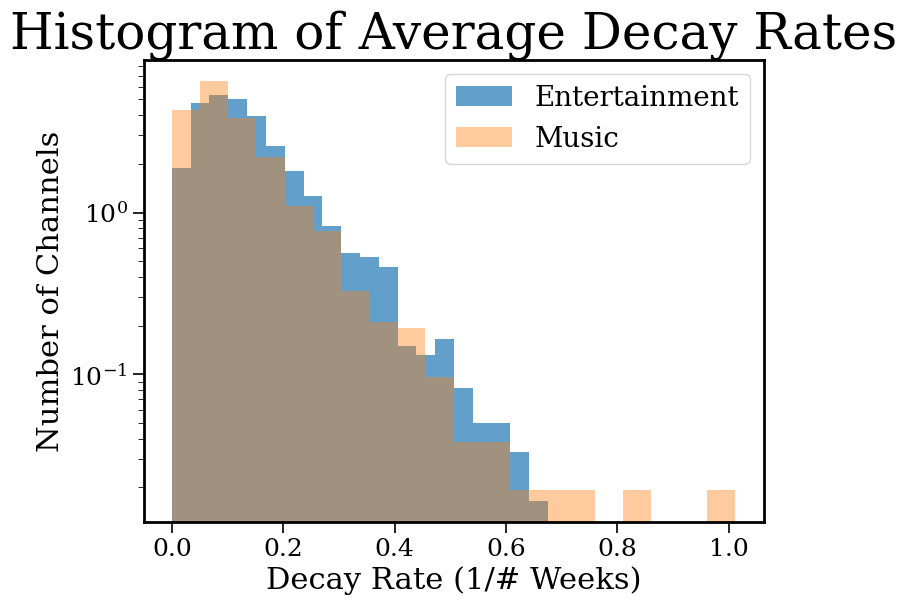

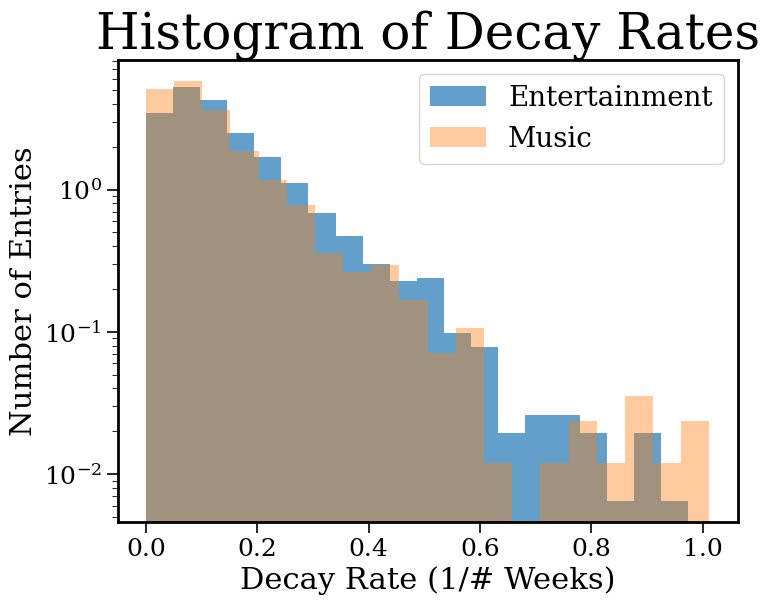

In [241]:
# Plot results and histograms of decay rates between peaks that return to baseline for Music and Entertainment
Part4_Utils.decay_rates_results_and_histograms(mod_music_decay_rates_filtered, mod_ent_decay_rates_filtered)

In [246]:
# Calculate peak heights for Music and Entertainment
music_peaks_filtered = Part4_Utils.calculate_peak_heights_baseline(df_filtered_music, metric='delta_views', baseline_window=4, prom_percent=0.3)
ent_peaks_filtered = Part4_Utils.calculate_peak_heights_baseline(df_filtered_entertainment, metric='delta_views', baseline_window=4, prom_percent=0.3)

Number of Peaks for Music: 14793
Number of Peaks for Entertainment: 32386


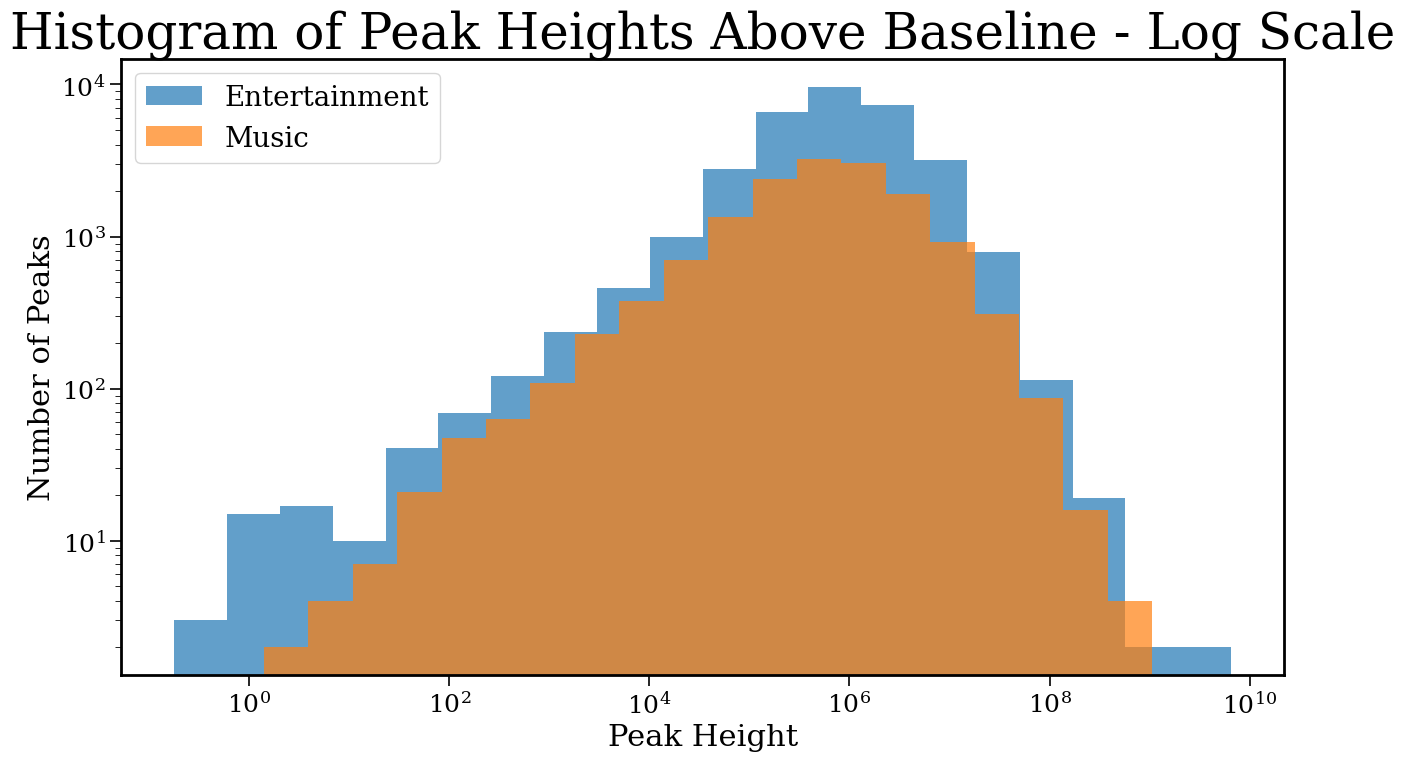

In [247]:
# Plot Histogram of peak heights
Part4_Utils.peak_heights_histogram(music_peaks_filtered, ent_peaks_filtered)

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:956: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


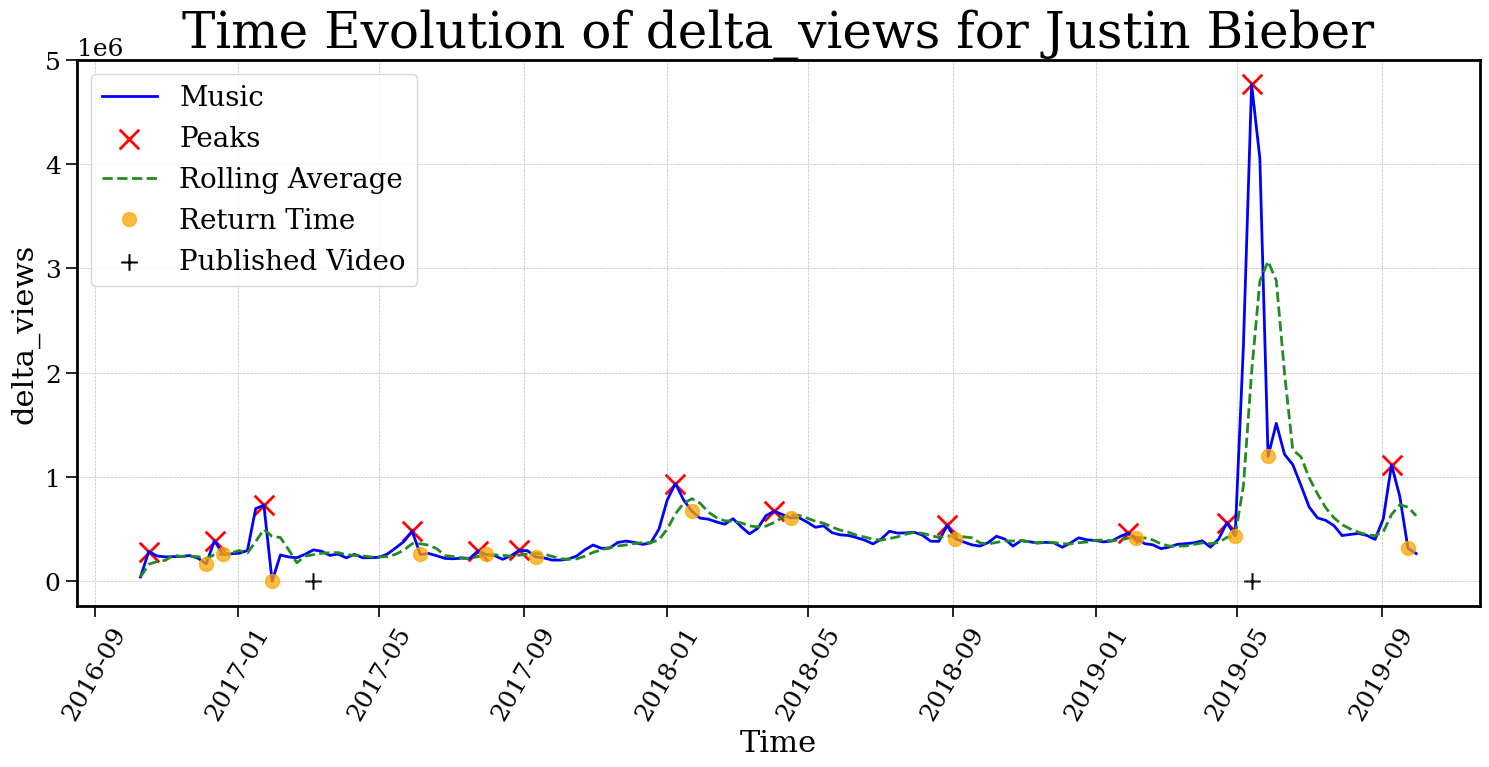

In [319]:
# Justin Bieber delta_views time-series
Part4_Utils.plot_channel_time_series(df_channels, df_time_series, channel_name='Justin Bieber', metric='delta_views', prom_percent=0.3, 
                                     rolling_window=4, tolerance=0.1, max_return_time=10)

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:956: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


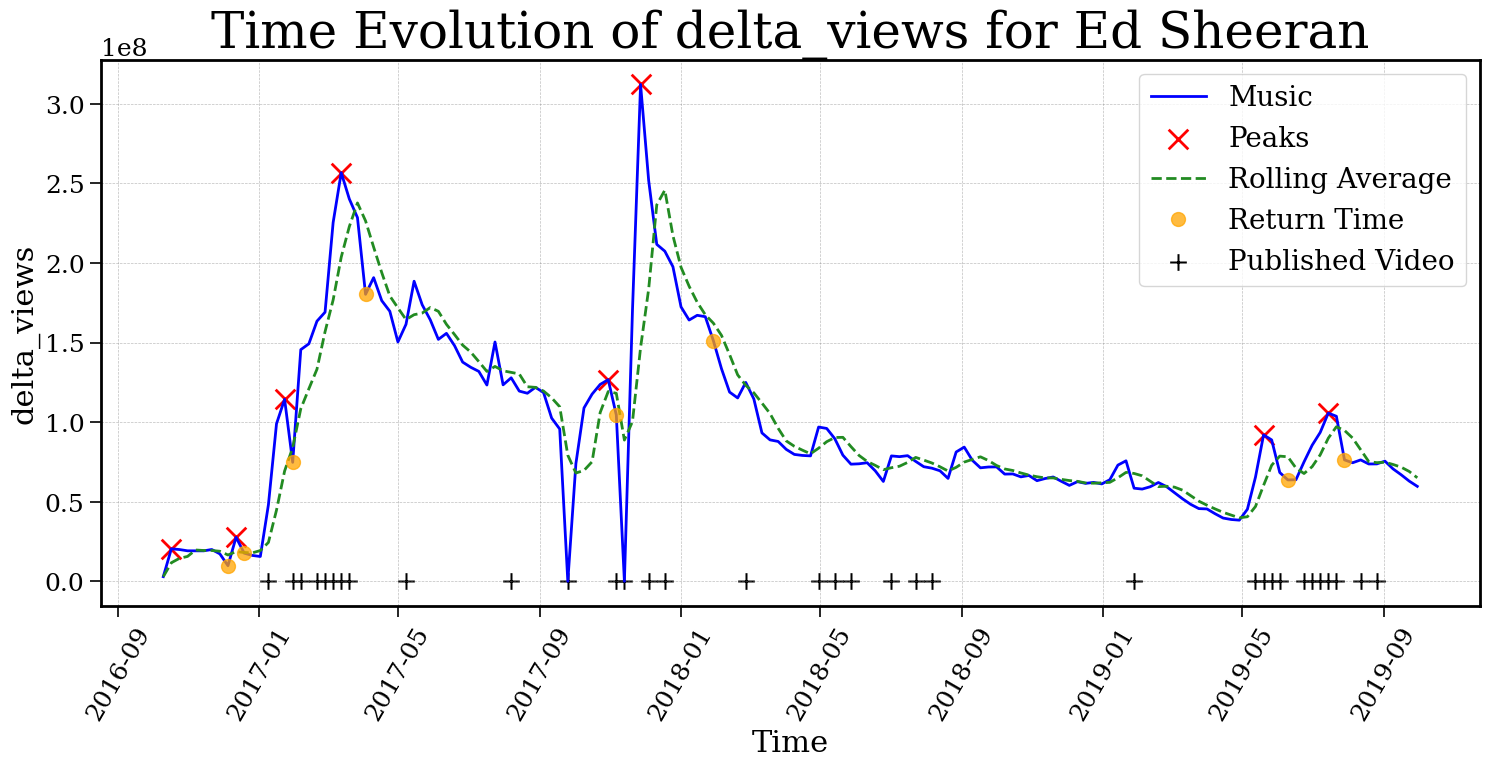

In [318]:
# Ed Sheeran delta_views time-series
Part4_Utils.plot_channel_time_series(df_channels, df_time_series, channel_name='Ed Sheeran', metric='delta_views', prom_percent=0.3, 
                                     rolling_window=4, tolerance=0.1, max_return_time=10)

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:956: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


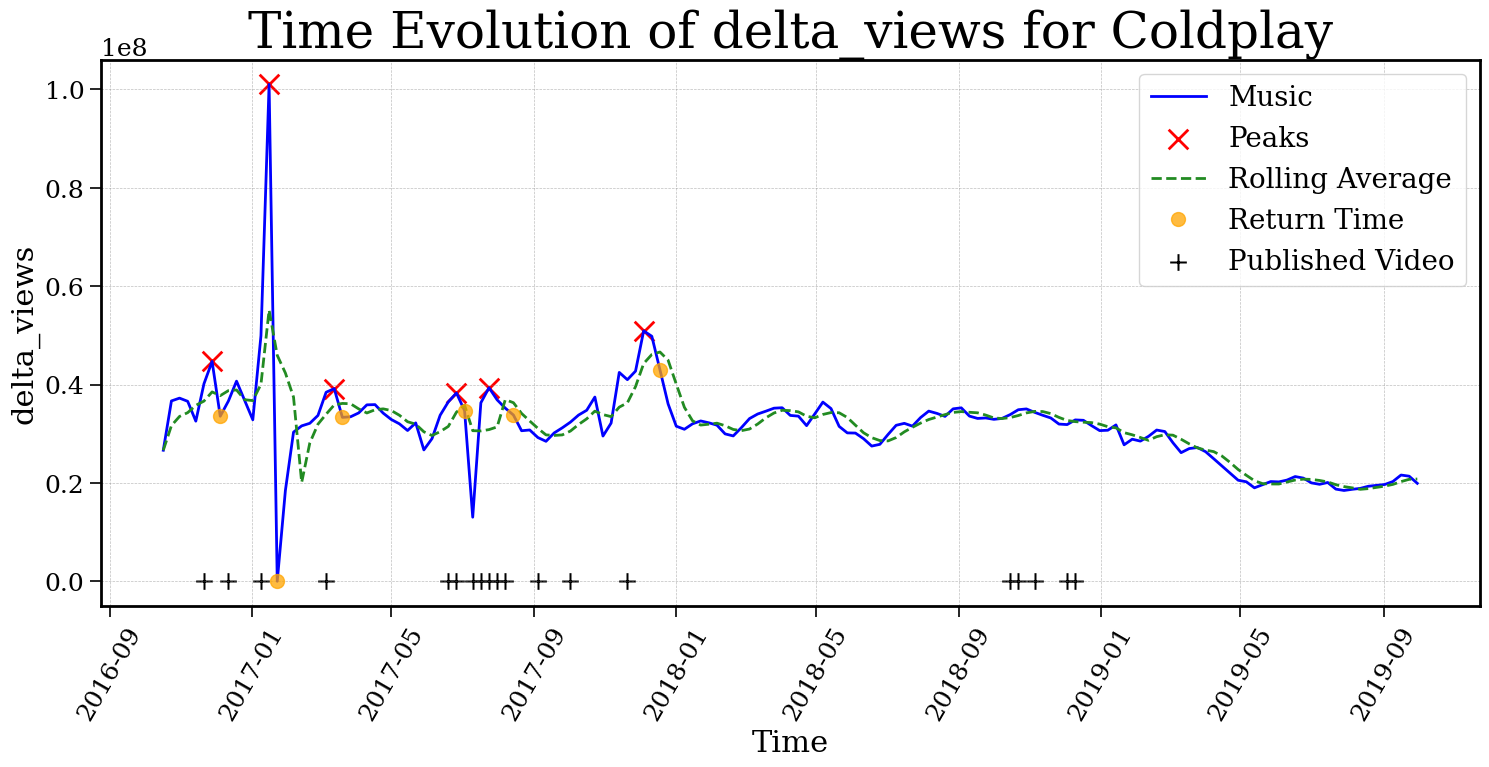

In [320]:
# Coldplay delta_views time-series
Part4_Utils.plot_channel_time_series(df_channels, df_time_series, channel_name='Coldplay', metric='delta_views', prom_percent=0.3, 
                                     rolling_window=4, tolerance=0.1, max_return_time=10)

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:956: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


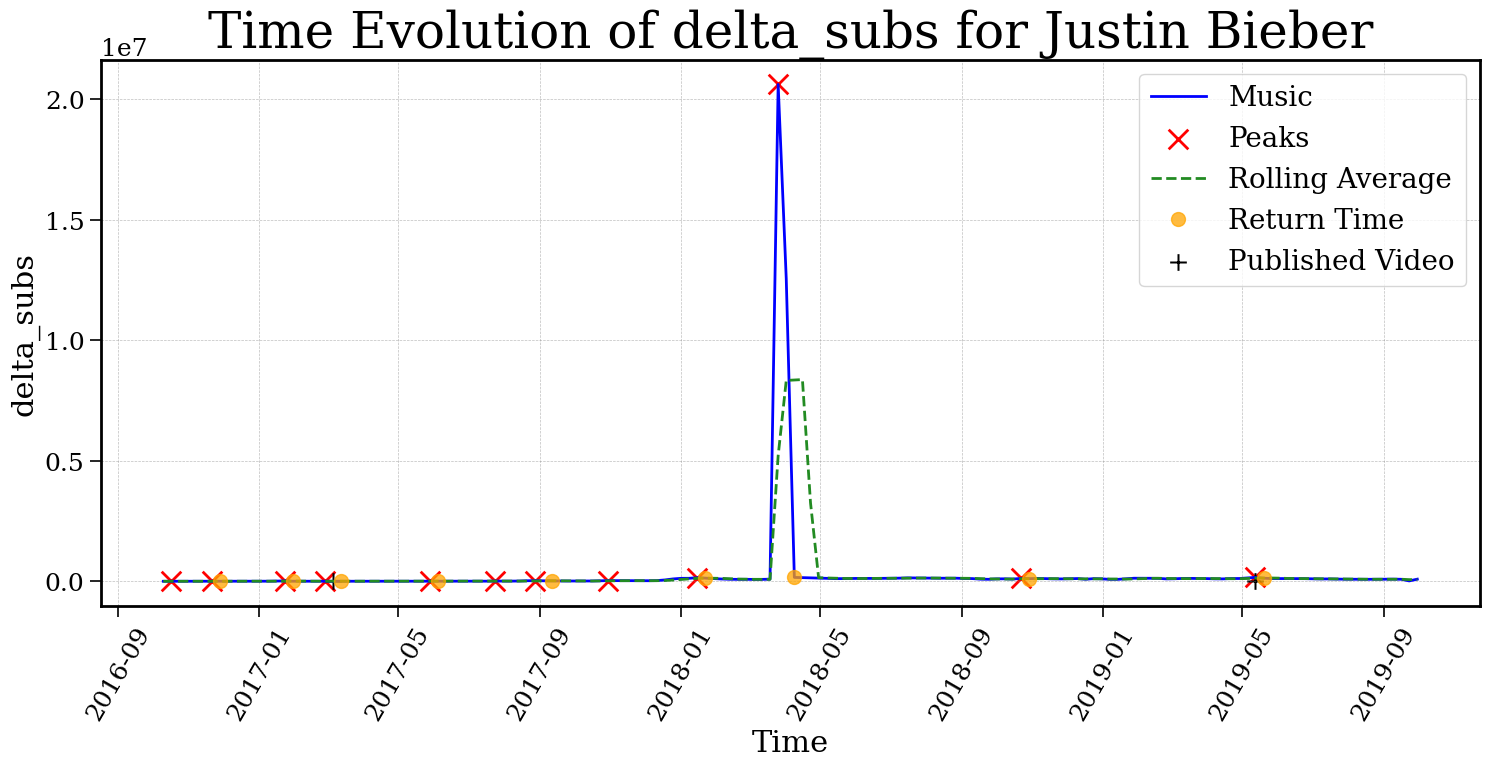

In [321]:
# Justin Bieber delta_subs time-series
Part4_Utils.plot_channel_time_series(df_channels, df_time_series, channel_name='Justin Bieber', metric='delta_subs', prom_percent=0.3, 
                                     rolling_window=4, tolerance=0.1, max_return_time=10)

c:\Users\MaxLo\Desktop\EPFL_MA3\ADA\ada-2024-project-tropicaltoucansinsight\Utils_Part4_Pop_Consistency.py:956: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


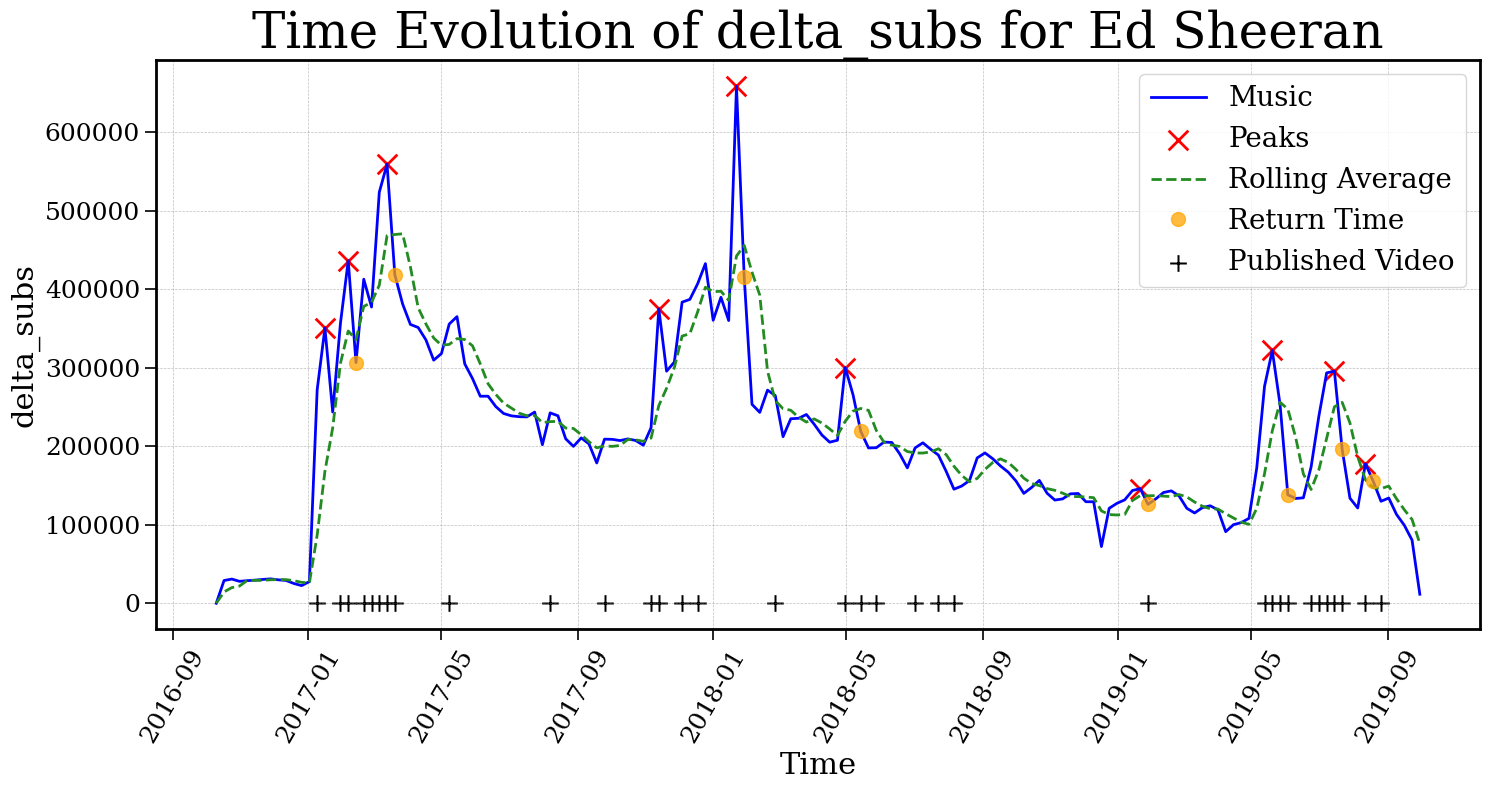

In [322]:
# Ed Sheeran delta_subs time-series
Part4_Utils.plot_channel_time_series(df_channels, df_time_series, channel_name='Ed Sheeran', metric='delta_subs', prom_percent=0.3, 
                                     rolling_window=4, tolerance=0.1, max_return_time=10)